# Air Pollution Analysis Overview

#### 1. [Data Preparation](#dp)

- 1.1.[Overall Dataset](#ove)

- 1.2.[Region-wise Dataset](#reg)

#### 2. [Data Exploration](#de)

- 2.1.[Handling Missing Values](#mv)

- 2.2.[Identifying Outliers](#io)

- 2.3.[Checking Periodic Results](#pr)

- 2.4.[Checking Correlations](#cc)

- 2.5.[Calendar Distribution](#cd)

<hr>

#### [References](#rf)

### Introduction

In this notebook, I try to get my hands dirty using datasets taken from [http://airnow.tehran.ir/](http://airnow.tehran.ir/) wensite. There I find complete AQI(Air-Quality Index) data from 1395/5/20 up to 1400/5/19. Let's dive into it and check what's going on:

Since their website's backend couldn't handle all 5 years I crunched them into 5 one-year-long datasets as follows:
    
    report.xlsx

up to
    
    report (4).xlsx

Also all files provide information with regard to all regions(districts/areas) in Tehran, but the first sheet of each, I believe is the average across them all. So for the simplicity I took only the first sheet of each, turn them into .csv files with the same name. Also as an extra step I downloaded the "hourly" data from 8 different regions, which I believe, could be revealing more about Tehran, where most of the transportations are happening which are the number 1 cause of air pollution in the first place. They might be of interest toward our goal here, too.

In [1]:
# importing stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False

<div id="dp">

## 1. Data Preparation

<div id="ove">

### 1.1.Overall Dataset

In [3]:
df = pd.read_csv("report.csv")

In [4]:
df.shape

(376, 15)

In [5]:
df.head(3)

,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.1,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.2,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.3,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.4,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.5,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.6,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.7,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.8,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.9,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.10,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.11,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.12,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.13,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???.14
0,???????,?????,CO,O3,NO2,SO2,PM10,PM2.5,AQI,???,???? ????,?????? ???? ???? ????,??????,????? ??????,??????
1,??? ??,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,246,102,15,NaN,NaN
2,?? ??????? ??,1399/05/19,20,106,70,18,55,72,106,NaN,NaN,1,NaN,NaN,NaN


The data seems pretty neat, the only problem here is persian language, so let's fix that up:

In [6]:
# second column is obviously date 
df.rename(columns={df.columns[1]: "date"}, inplace=True)

In [7]:
# we can use the second row entries as our column names
df.rename(columns={df.columns[i]:df.iloc[0,i] for i in range(2, 10)}, inplace=True)
df.rename(columns={df.columns[9]:"clean",\
                  df.columns[10]:"acceptable",\
                  df.columns[11]:"unhealthy_for_the_sensitive",\
                  df.columns[12]:"unhealthy",\
                  df.columns[13]:"very_unhealthy",\
                  df.columns[14]:"hazardous"},\
         inplace=True)

In [8]:
df.head()

,????? ?????? ??? ?? ???? ??????? ? ?? ????? ???,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
0,???????,?????,CO,O3,NO2,SO2,PM10,PM2.5,AQI,???,???? ????,?????? ???? ???? ????,??????,????? ??????,??????
1,??? ??,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,246,102,15,NaN,NaN
2,?? ??????? ??,1399/05/19,20,106,70,18,55,72,106,NaN,NaN,1,NaN,NaN,NaN
3,?? ??????? ??,1399/05/20,30,66,81,19,57,74,81,NaN,1,NaN,NaN,NaN,NaN
4,?? ??????? ??,1399/05/21,35,102,89,25,64,82,102,NaN,NaN,1,NaN,NaN,NaN


The first column and the two first rows are unimportant so let's get rid of them.

In [9]:
df.drop(columns=df.columns[0],axis=0, inplace=True)
df.drop(index=[0,1], axis=1, inplace=True)

In [10]:
df.head()

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
2,1399/05/19,20,106,70,18,55,72,106,NaN,NaN,1,NaN,NaN,NaN
3,1399/05/20,30,66,81,19,57,74,81,NaN,1,NaN,NaN,NaN,NaN
4,1399/05/21,35,102,89,25,64,82,102,NaN,NaN,1,NaN,NaN,NaN
5,1399/05/22,29,108,89,26,65,85,108,NaN,NaN,1,NaN,NaN,NaN
6,1399/05/23,34,76,87,19,70,91,91,NaN,1,NaN,NaN,NaN,NaN


In [11]:
df.tail(10)

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
366,1400/05/17,31,59,63,16,51,67,67,NaN,1,NaN,NaN,NaN,NaN
367,1400/05/18,27,59,67,15,48,66,67,NaN,1,NaN,NaN,NaN,NaN
368,1400/05/19,25,64,72,14,51,66,72,NaN,1,NaN,NaN,NaN,NaN
369,1400/05/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,246,102,15,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,????? ?????? ?????? ???????,CO,O3,NO2,SO2,PM10,PM2.5,AQI,NaN,NaN,NaN,NaN,NaN,NaN
375,367,0,28,5,0,9,93,117,NaN,NaN,NaN,NaN,NaN,NaN


A few rows at bottom are also useless for our purpose:

In [12]:
df.drop(index=[i for i in range(369,376)], axis=1, inplace=True)
df

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
2,1399/05/19,20,106,70,18,55,72,106,NaN,NaN,1,NaN,NaN,NaN
3,1399/05/20,30,66,81,19,57,74,81,NaN,1,NaN,NaN,NaN,NaN
4,1399/05/21,35,102,89,25,64,82,102,NaN,NaN,1,NaN,NaN,NaN
5,1399/05/22,29,108,89,26,65,85,108,NaN,NaN,1,NaN,NaN,NaN
6,1399/05/23,34,76,87,19,70,91,91,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1400/05/15,22,114,72,21,50,70,114,NaN,NaN,1,NaN,NaN,NaN
365,1400/05/16,23,114,72,20,44,71,114,NaN,NaN,1,NaN,NaN,NaN
366,1400/05/17,31,59,63,16,51,67,67,NaN,1,NaN,NaN,NaN,NaN
367,1400/05/18,27,59,67,15,48,66,67,NaN,1,NaN,NaN,NaN,NaN


Ahh, much better! Now we only need to repeat the process for the rest and stack them up together:

In [13]:
data = df
for i in range(4):
    df = pd.read_csv(f"report ({i + 1}).csv")
    # just like above
    df.rename(columns={df.columns[1]: "date"}, inplace=True)
    df.rename(columns={df.columns[i]:df.iloc[0,i] \
                       for i in range(2, 10)}, inplace=True)
    df.rename(columns={df.columns[9]:"clean",\
                  df.columns[10]:"acceptable",\
                  df.columns[11]:"unhealthy_for_the_sensitive",\
                  df.columns[12]:"unhealthy",\
                  df.columns[13]:"very_unhealthy",\
                  df.columns[14]:"hazardous"},\
         inplace=True)
    df.drop(columns=df.columns[0],axis=0, inplace=True)
    df.drop(index=[0,1], axis=1, inplace=True)
    if i == 3:
        df.drop(index=[i for i in range(368,375)], axis=1, inplace=True)
    else:
        df.drop(index=[i for i in range(367,374)], axis=1, inplace=True)
    
    # concatenating with the rest
    data = pd.concat([df, data], ignore_index=True)

In [14]:
data

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
0,1395/05/19,46,62,84,20,60,82,82,NaN,1,NaN,NaN,NaN,NaN
1,1395/05/20,52,63,84,22,63,92,92,NaN,1,NaN,NaN,NaN,NaN
2,1395/05/21,46,67,88,20,67,90,90,NaN,1,NaN,NaN,NaN,NaN
3,1395/05/22,48,67,80,18,63,85,85,NaN,1,NaN,NaN,NaN,NaN
4,1395/05/23,43,55,83,18,58,85,85,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1400/05/15,22,114,72,21,50,70,114,NaN,NaN,1,NaN,NaN,NaN
1824,1400/05/16,23,114,72,20,44,71,114,NaN,NaN,1,NaN,NaN,NaN
1825,1400/05/17,31,59,63,16,51,67,67,NaN,1,NaN,NaN,NaN,NaN
1826,1400/05/18,27,59,67,15,48,66,67,NaN,1,NaN,NaN,NaN,NaN


Working with shamsi dates is almost impossible (yet!) in pandas, so I convert them back to their Gregorian format, so we can do stuff with them(like sorting):

In [15]:
import jdatetime

data.date = data.date.apply(lambda x: \
                            jdatetime.date(*tuple(map(int, \
                                                      x.split("/"))))\
                            .togregorian())

In [16]:
data.head()

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
0,2016-08-09,46,62,84,20,60,82,82,NaN,1,NaN,NaN,NaN,NaN
1,2016-08-10,52,63,84,22,63,92,92,NaN,1,NaN,NaN,NaN,NaN
2,2016-08-11,46,67,88,20,67,90,90,NaN,1,NaN,NaN,NaN,NaN
3,2016-08-12,48,67,80,18,63,85,85,NaN,1,NaN,NaN,NaN,NaN
4,2016-08-13,43,55,83,18,58,85,85,NaN,1,NaN,NaN,NaN,NaN


In [17]:
data.sort_values("date", inplace=True, ascending=True)
data.date = pd.to_datetime(data.date)

In [18]:
data

,date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
0,2016-08-09,46,62,84,20,60,82,82,NaN,1,NaN,NaN,NaN,NaN
1,2016-08-10,52,63,84,22,63,92,92,NaN,1,NaN,NaN,NaN,NaN
2,2016-08-11,46,67,88,20,67,90,90,NaN,1,NaN,NaN,NaN,NaN
3,2016-08-12,48,67,80,18,63,85,85,NaN,1,NaN,NaN,NaN,NaN
4,2016-08-13,43,55,83,18,58,85,85,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2021-08-06,22,114,72,21,50,70,114,NaN,NaN,1,NaN,NaN,NaN
1824,2021-08-07,23,114,72,20,44,71,114,NaN,NaN,1,NaN,NaN,NaN
1825,2021-08-08,31,59,63,16,51,67,67,NaN,1,NaN,NaN,NaN,NaN
1826,2021-08-09,27,59,67,15,48,66,67,NaN,1,NaN,NaN,NaN,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         1828 non-null   datetime64[ns]
 1   CO                           1828 non-null   object        
 2   O3                           1828 non-null   object        
 3   NO2                          1828 non-null   object        
 4   SO2                          1828 non-null   object        
 5   PM10                         1828 non-null   object        
 6   PM2.5                        1828 non-null   object        
 7   AQI                          1828 non-null   object        
 8   clean                        96 non-null     object        
 9   acceptable                   1256 non-null   object        
 10  unhealthy_for_the_sensitive  437 non-null    object        
 11  unhealthy                    39 non-null   

Wait! All dtypes are objects!? Let's make them numbers.

In [20]:
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         1828 non-null   datetime64[ns]
 1   CO                           1828 non-null   int64         
 2   O3                           1828 non-null   int64         
 3   NO2                          1828 non-null   int64         
 4   SO2                          1828 non-null   int64         
 5   PM10                         1828 non-null   int64         
 6   PM2.5                        1828 non-null   int64         
 7   AQI                          1828 non-null   int64         
 8   clean                        96 non-null     float64       
 9   acceptable                   1256 non-null   float64       
 10  unhealthy_for_the_sensitive  437 non-null    float64       
 11  unhealthy                    39 non-null   

Since it's not an "Integer Programming" problem and we might be interested into feeding this data into a model, it's best to convert those `int64` values to `float`:

In [22]:
data[data.columns[2:9]] = data[data.columns[2:9]]\
.astype(np.float64)

Oh and one thing! What if we could provide days of the week for each instance's date. That would be nice and it could provide additional insights, who wants more insights? I do!

In [23]:
data["weekday"] = data.date.apply(lambda x: x.day_name())
data = data[["date", "weekday"]+list(data.columns[1:-1])]
data.head()

,date,weekday,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
0,2016-08-09,Tuesday,46,62.0,84.0,20.0,60.0,82.0,82.0,NaN,1.0,NaN,NaN,NaN,NaN
1,2016-08-10,Wednesday,52,63.0,84.0,22.0,63.0,92.0,92.0,NaN,1.0,NaN,NaN,NaN,NaN
2,2016-08-11,Thursday,46,67.0,88.0,20.0,67.0,90.0,90.0,NaN,1.0,NaN,NaN,NaN,NaN
3,2016-08-12,Friday,48,67.0,80.0,18.0,63.0,85.0,85.0,NaN,1.0,NaN,NaN,NaN,NaN
4,2016-08-13,Saturday,43,55.0,83.0,18.0,58.0,85.0,85.0,NaN,1.0,NaN,NaN,NaN,NaN


In [24]:
data.to_csv("daily_air.csv", index=False)

<div id="reg">

### 1.2.Region-wise Dataset

I downloaded data from different stations into excel files with the station names (Bahman.xlsx, Mahalati.xlsx, etc.) so we need to examine them, format them and then merge them all together into a neat whole dataset. We begin by examining one of them:

In [25]:
bahman = pd.read_excel("Bahman.xlsx")
bahman.head()

,"گزارش:میانگین ساعتی,ایستگاهشهرداری.منطقه16, از تاریخ 1395/05/20 الی 1400/05/19",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ایستگاه,تاریخ,ساعت,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,SO2 ppb,PM 10 ug/m3,PM 2.5 ug/m3
1,شهرداری.منطقه16,1395/05/20,0,11,10,497,137,633,18,NaN,NaN
2,شهرداری.منطقه16,1395/05/20,1,12,11,475,151,625,18,NaN,NaN
3,شهرداری.منطقه16,1395/05/20,2,10,6,185,100,285,19,NaN,NaN
4,شهرداری.منطقه16,1395/05/20,3,11,6,181,85,266,17,NaN,NaN


Looks good, except that the column names must be the first row!

In [26]:
# remaking column names
bahman.columns = bahman.iloc[0,:]

# getting rid of the first row
bahman.drop(index=0, inplace=True)

In [27]:
bahman.head()

,ایستگاه,تاریخ,ساعت,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,SO2 ppb,PM 10 ug/m3,PM 2.5 ug/m3
1,شهرداری.منطقه16,1395/05/20,0,11,10,497,137,633,18,NaN,NaN
2,شهرداری.منطقه16,1395/05/20,1,12,11,475,151,625,18,NaN,NaN
3,شهرداری.منطقه16,1395/05/20,2,10,6,185,100,285,19,NaN,NaN
4,شهرداری.منطقه16,1395/05/20,3,11,6,181,85,266,17,NaN,NaN
5,شهرداری.منطقه16,1395/05/20,4,10,5,139,80,218,16,NaN,NaN


In [28]:
# using a proper name for district 16
bahman.loc[:,["ایستگاه"]] = "Bahman"

In [29]:
# using appropriate names for columns

bahman = bahman.rename(columns={"ایستگاه": "station", "تاریخ": "date",\
                      "ساعت": "hour", "O3 ppb": "O3", "CO ppm": "CO", \
                               "NO ppb":"NO", "NO2 ppb":"NO2",\
                               "NOx ppb":"NOx", "SO2 ppb":"SO2",\
                               "PM 10 ug/m3":"PM10", "PM 2.5 ug/m3":"PM2.5"})
bahman.head()

,station,date,hour,O3,CO,NO,NO2,NOx,SO2,PM10,PM2.5
1,Bahman,1395/05/20,0,11,10,497,137,633,18,NaN,NaN
2,Bahman,1395/05/20,1,12,11,475,151,625,18,NaN,NaN
3,Bahman,1395/05/20,2,10,6,185,100,285,19,NaN,NaN
4,Bahman,1395/05/20,3,11,6,181,85,266,17,NaN,NaN
5,Bahman,1395/05/20,4,10,5,139,80,218,16,NaN,NaN


In [30]:
# making date into a proper format
import jdatetime

bahman.date = bahman.date.apply(lambda x: \
                            jdatetime.date(*tuple(map(int, \
                                                      x.split("/"))))\
                            .togregorian())

In [31]:
bahman.date = pd.to_datetime(bahman.date)
bahman["weekday"] = bahman.date.apply(lambda x: x.day_name())
bahman = bahman[["station", "date", "weekday"]+list(bahman.columns[2:-1])]
bahman.head()

,station,date,weekday,hour,O3,CO,NO,NO2,NOx,SO2,PM10,PM2.5
1,Bahman,2016-08-10,Wednesday,0,11,10,497,137,633,18,NaN,NaN
2,Bahman,2016-08-10,Wednesday,1,12,11,475,151,625,18,NaN,NaN
3,Bahman,2016-08-10,Wednesday,2,10,6,185,100,285,19,NaN,NaN
4,Bahman,2016-08-10,Wednesday,3,11,6,181,85,266,17,NaN,NaN
5,Bahman,2016-08-10,Wednesday,4,10,5,139,80,218,16,NaN,NaN


Great! Now we only need to repeat this process for 7 more datasets. So it's wise to build a function for all the things we did here to do that for us:

In [32]:
def trim_data(data):
    import jdatetime
    
    data = data.copy()
    data.columns = data.iloc[0,:]
    data.drop(index=0, inplace=True)
    data = data.rename(columns={"ایستگاه": "station", "تاریخ": "date",\
                      "ساعت": "hour", "O3 ppb": "O3", "CO ppm": "CO", \
                               "NO ppb":"NO", "NO2 ppb":"NO2",\
                               "NOx ppb":"NOx", "SO2 ppb":"SO2",\
                               "PM 10 ug/m3":"PM10", "PM 2.5 ug/m3":"PM2.5"})

    data.date = data.date.apply(lambda x: \
                            jdatetime.date(*tuple(map(int, \
                                                      x.split("/"))))\
                            .togregorian())
    
    data.date = pd.to_datetime(data.date)
    data["weekday"] = data.date.apply(lambda x: x.day_name())
    data = data[["station", "date", "weekday"]+list(data.columns[2:-1])]
    
    return data

In [33]:
# this will take a while

mahalati = pd.read_excel("Mahalati.xlsx")
mahalati = trim_data(mahalati)
mahalati.loc[:,"station"] = "Mahalati"

poonak = pd.read_excel("Poonak.xlsx")
poonak = trim_data(poonak)
poonak.loc[:,"station"] = "Poonak"

qazvin = pd.read_excel("Qazvin.xlsx")
qazvin = trim_data(qazvin)
qazvin.loc[:,"station"] = "Qazvin"

shahrak = pd.read_excel("Shahrak Esteghlal.xlsx")
shahrak = trim_data(shahrak)
shahrak.loc[:,"station"] = "Shahrak Esteghlal"

sharif = pd.read_excel("Sharif.xlsx")
sharif = trim_data(sharif)
sharif.loc[:,"station"] = "Sharif"

tarbiat = pd.read_excel("Tarbiat Modares.xlsx")
tarbiat = trim_data(tarbiat)
tarbiat.loc[:,"station"] = "Tarbiat Modares"

tehranpars = pd.read_excel("Tehran Pars.xlsx")
tehranpars = trim_data(tehranpars)
tehranpars.loc[:,"station"] = "Tehran Pars"

In [34]:
dfs = [bahman, mahalati, poonak, qazvin, shahrak, sharif, tarbiat, tehranpars]
air = pd.concat(dfs)

In [35]:
air.shape

(313264, 12)

In [36]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313264 entries, 1 to 26857
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  313264 non-null  object        
 1   date     313264 non-null  datetime64[ns]
 2   weekday  313264 non-null  object        
 3   hour     313264 non-null  object        
 4   O3       228242 non-null  object        
 5   CO       237344 non-null  object        
 6   NO       247959 non-null  object        
 7   NO2      247959 non-null  object        
 8   NOx      247959 non-null  object        
 9   SO2      233407 non-null  object        
 10  PM10     224044 non-null  object        
 11  PM2.5    211712 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 31.1+ MB


In [37]:
air.sort_values(by=["station", "date","hour"], ascending=True, inplace=True)

In [38]:
air.reset_index(drop = True, inplace = True)
air.head()

,station,date,weekday,hour,O3,CO,NO,NO2,NOx,SO2,PM10,PM2.5
0,Bahman,2016-08-10,Wednesday,0,11,10,497,137,633,18,NaN,NaN
1,Bahman,2016-08-10,Wednesday,1,12,11,475,151,625,18,NaN,NaN
2,Bahman,2016-08-10,Wednesday,2,10,6,185,100,285,19,NaN,NaN
3,Bahman,2016-08-10,Wednesday,3,11,6,181,85,266,17,NaN,NaN
4,Bahman,2016-08-10,Wednesday,4,10,5,139,80,218,16,NaN,NaN


In [39]:
air.head()

,station,date,weekday,hour,O3,CO,NO,NO2,NOx,SO2,PM10,PM2.5
0,Bahman,2016-08-10,Wednesday,0,11,10,497,137,633,18,NaN,NaN
1,Bahman,2016-08-10,Wednesday,1,12,11,475,151,625,18,NaN,NaN
2,Bahman,2016-08-10,Wednesday,2,10,6,185,100,285,19,NaN,NaN
3,Bahman,2016-08-10,Wednesday,3,11,6,181,85,266,17,NaN,NaN
4,Bahman,2016-08-10,Wednesday,4,10,5,139,80,218,16,NaN,NaN


<div class="alert alert-warning">
    
Upon some visualization of the data I found out that some of the values are negative, that is plain wrong, so I decided to change them to `NaN`, so I will be treating them like missing values.

In [40]:
# these are 255 rows with negative values and this is the list of their indices
negative_culprits = air.loc[(air.O3 < 0) | (air.NO < 0) |\
       (air.CO < 0) | (air.NO2 < 0) |\
       (air.NOx < 0) | (air.SO2 < 0) |\
       (air.PM10 < 0) | (air["PM2.5"] < 0)].index

air.iloc[negative_culprits,:].head()

,station,date,weekday,hour,O3,CO,NO,NO2,NOx,SO2,PM10,PM2.5
15684,Bahman,2018-06-09,Saturday,14,59,0,-1,11,10,2,126,NaN
15685,Bahman,2018-06-09,Saturday,15,64,0,-1,12,11,3,80,NaN
15686,Bahman,2018-06-09,Saturday,16,69,0,-1,14,12,3,54,NaN
15687,Bahman,2018-06-09,Saturday,17,72,0,-2,14,12,3,43,NaN
35083,Bahman,2020-10-24,Saturday,16,59,NaN,NaN,NaN,NaN,-1,29,NaN


In [41]:
for i in negative_culprits:
    for j in range(4,12):
        if air.iloc[i, j] < 0:
            air.iloc[i, j] = np.nan

Nice, now we need to save this data:

In [42]:
air.to_csv("hourly_air.csv", index=False)

In [43]:
del(air, data)

<div id="de">

## Data Exploration

Now let's get quick feel of a data by having an overview information on the dataset:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False

overall = pd.read_csv("daily_air.csv")
air = pd.read_csv("hourly_air.csv")

In [4]:
air.date = pd.to_datetime(air.date)
overall.date = pd.to_datetime(overall.date)

In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313264 entries, 0 to 313263
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  313264 non-null  object        
 1   date     313264 non-null  datetime64[ns]
 2   weekday  313264 non-null  object        
 3   hour     313264 non-null  int64         
 4   O3       228202 non-null  float64       
 5   CO       237342 non-null  float64       
 6   NO       247725 non-null  float64       
 7   NO2      247958 non-null  float64       
 8   NOx      247957 non-null  float64       
 9   SO2      233393 non-null  float64       
 10  PM10     224044 non-null  float64       
 11  PM2.5    211710 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 28.7+ MB


Wow! too much null values. Let's see how much missing data we are dealing with:

<div id="mv">

### Checking Missing Values

#### Regional Hourly Data

In [6]:
air.isnull().sum()

station         0
date            0
weekday         0
hour            0
O3          85062
CO          75922
NO          65539
NO2         65306
NOx         65307
SO2         79871
PM10        89220
PM2.5      101554
dtype: int64

Seems a lot! Let's check what percentage of the data is missing!

In [7]:
# Calculating the percentage of missing values. 
# Rounding the percentage up to 4 chars.
round(air.isnull().sum()/ air.shape[0], 4) * 100

station     0.00
date        0.00
weekday     0.00
hour        0.00
O3         27.15
CO         24.24
NO         20.92
NO2        20.85
NOx        20.85
SO2        25.50
PM10       28.48
PM2.5      32.42
dtype: float64

Yep, almost 30% of the data is missing. We can't get rid of them or use imputation that easily since our data is regional, hourly and daily. Probably some stations have not been doing their job well. So we need to get a closer look by dividing data back to their region and see what regions are causing this massive lack of data.

In [8]:
air.station.unique()

array(['Bahman', 'Mahalati', 'Poonak', 'Qazvin', 'Shahrak Esteghlal',
       'Sharif', 'Tarbiat Modares', 'Tehran Pars'], dtype=object)

In [9]:
culprit = "Qazvin"

round(air.query(f"station == '{culprit}'").isnull().sum() / \
air.query(f"station == '{culprit}'").shape[0], 4) * 100

station      0.00
date         0.00
weekday      0.00
hour         0.00
O3          55.67
CO          11.17
NO          22.99
NO2         22.89
NOx         22.89
SO2         31.31
PM10       100.00
PM2.5       14.54
dtype: float64

Yeah just as we suspected. It turns out that `Bahman`, `Qazvin`, and `Tehran Pars` stations' records have way more missing values that we can deal with.

In [10]:
df = air.query("station not in ('Bahman', 'Qazvin', 'Tehran Pars')")\
.reset_index(drop=True)

In [11]:
df.isnull().sum()/df.shape[0]

station    0.000000
date       0.000000
weekday    0.000000
hour       0.000000
O3         0.155466
CO         0.185046
NO         0.097000
NO2        0.096145
NOx        0.096149
SO2        0.118487
PM10       0.056408
PM2.5      0.232615
dtype: float64

Sounds better. Still the number of missing values are not that small, meaning it would be better not to drop them. We use `interpolate` here to take care of the imputation. But before that we need to create `Timestamp` index as follows:

In [12]:
# creating a new column datetime constructed using date and hour columns
df["datetime"] = df.date.astype(str) + "-" + df.hour.astype(str)

In [13]:
df.datetime.head()

0    2016-08-10-0
1    2016-08-10-1
2    2016-08-10-2
3    2016-08-10-3
4    2016-08-10-4
Name: datetime, dtype: object

In [14]:
# converting it into Python-readable datetime
from datetime import datetime

df.datetime = \
df["datetime"].apply(lambda x: datetime(year = int(x.split("-")[0]),\
                                       month = int(x.split("-")[1]),\
                                       day = int(x.split("-")[2]),\
                                       hour = int(x.split("-")[3])))

<div class="alert alert-danger">

Ok, there's one thing we need to do before the "interpolation", and that's separating our dataset into different regions and do the interpolation for each then merge them back together. The reason is that if we make 'datetime' our index, we end up with duplicate indices and that might turn into bad side effects, who knows maybe it'll work anyway, but I'm not an experienced user of `.interpolate` and I don't want to risk messing with our dataset.

In [15]:
# checking what stations are left
stations = df.station.unique()
stations = list(stations)
stations

['Mahalati', 'Poonak', 'Shahrak Esteghlal', 'Sharif', 'Tarbiat Modares']

In [16]:
dfs = []

for i, station in enumerate(stations):
    temp = df[df.station == station].copy()
#     temp = df.query(f"station == {station}")

    # using our new column datetime as our index
    temp.set_index("datetime", inplace=True)
    
    # interpolating some missing values using .interpolate
    temp[temp.columns[4:]] = temp[temp.columns[4:]].interpolate(method="time")
    # why 4:? because after indexing datetime column, the columns with
    # missing values start with O3, which is the 5th column(index=4)
    
    temp.reset_index(drop = False, inplace = True)
#     tmp.drop(columns=df.columns[0],axis=0, inplace=True)
    dfs.append(temp)

df = pd.concat(dfs)
df.reset_index(drop = True, inplace=True)

In [17]:
df.head()

,datetime,station,date,weekday,hour,O3,CO,NO,NO2,NOx,SO2,PM10,PM2.5
0,2016-08-10 00:00:00,Mahalati,2016-08-10,Wednesday,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-08-10 01:00:00,Mahalati,2016-08-10,Wednesday,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-08-10 02:00:00,Mahalati,2016-08-10,Wednesday,2,3.0,NaN,NaN,NaN,NaN,NaN,146.0,NaN
3,2016-08-10 03:00:00,Mahalati,2016-08-10,Wednesday,3,2.0,NaN,NaN,NaN,NaN,NaN,126.0,NaN
4,2016-08-10 04:00:00,Mahalati,2016-08-10,Wednesday,4,2.0,NaN,NaN,NaN,NaN,NaN,178.0,NaN


Recall that the percentages of missing values were as follows: 
    
    station     0.000000
    date        0.000000
    weekday     0.000000
    hour        0.000000
    O3          0.155276
    CO          0.185042
    NO          0.096140
    NO2         0.096140
    NOx         0.096140
    SO2         0.118477
    PM10        0.056408
    PM2.5       0.232606
    dtype: float64

In [18]:
df.isnull().sum()/df.shape[0]

datetime    0.000000
station     0.000000
date        0.000000
weekday     0.000000
hour        0.000000
O3          0.015360
CO          0.080851
NO          0.019410
NO2         0.019410
NOx         0.019410
SO2         0.031391
PM10        0.000010
PM2.5       0.176696
dtype: float64

Cool, huh? We reduced the percentage of missing values to less than 5% for most variables, except for `PM2.5` and `CO`. We can safely drop most of them since it should not impact the data that much, and try something like `rolling` mean (Not a great approach) for `PM2.5` and `CO` : 

In [19]:
df["PM2.5"].fillna(df["PM2.5"].rolling(24,min_periods=1,).mean(), inplace=True)

df["CO"].fillna(df.CO.rolling(24,min_periods=1,).mean(), inplace=True)

In [20]:
# redoing the interpolating to check if it have any effect this time with akima method
dfs = []

for i, station in enumerate(stations):
    temp = df[df.station == station].copy()
#     temp = df.query(f"station == {station}")

    # using our new column datetime as our index
    temp.set_index("datetime", inplace=True)
    
    # interpolating some missing values using .interpolate
    temp[temp.columns[4:]] = temp[temp.columns[4:]].interpolate(method="time")
    # why 4:? because after indexing datetime column, the columns with
    # missing values start with O3, which is the 5th column(index=4)
    
    temp.reset_index(drop = False, inplace = True)
#     tmp.drop(columns=df.columns[0],axis=0, inplace=True)
    dfs.append(temp)

df = pd.concat(dfs)
df.reset_index(drop = True, inplace=True)

In [21]:
df.isnull().sum()/df.shape[0]

datetime    0.000000
station     0.000000
date        0.000000
weekday     0.000000
hour        0.000000
O3          0.015360
CO          0.011145
NO          0.019410
NO2         0.019410
NOx         0.019410
SO2         0.031391
PM10        0.000010
PM2.5       0.176696
dtype: float64

I guess that's good bye for `PM2.5`, since the number of missing values for it is still high, and I can't think of anything else to try for now. So I just get rid of the whole column:

In [22]:
df.drop(columns=["datetime","PM2.5"], inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

station    0
date       0
weekday    0
hour       0
O3         0
CO         0
NO         0
NO2        0
NOx        0
SO2        0
PM10       0
dtype: int64

In [25]:
air = df

#### Overall Daily Data

In [26]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         1828 non-null   datetime64[ns]
 1   weekday                      1828 non-null   object        
 2   CO                           1828 non-null   int64         
 3   O3                           1828 non-null   float64       
 4   NO2                          1828 non-null   float64       
 5   SO2                          1828 non-null   float64       
 6   PM10                         1828 non-null   float64       
 7   PM2.5                        1828 non-null   float64       
 8   AQI                          1828 non-null   float64       
 9   clean                        96 non-null     float64       
 10  acceptable                   1256 non-null   float64       
 11  unhealthy_for_the_sensitive  437 non-null  

Unlike regional dataset, this dataset looks healthy! It might be better to convert those `int64` to `float64`: 

In [27]:
overall.fillna(0, inplace=True)
overall.head()

,date,weekday,CO,O3,NO2,SO2,PM10,PM2.5,AQI,clean,acceptable,unhealthy_for_the_sensitive,unhealthy,very_unhealthy,hazardous
0,2016-08-09,Tuesday,46,62.0,84.0,20.0,60.0,82.0,82.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-08-10,Wednesday,52,63.0,84.0,22.0,63.0,92.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016-08-11,Thursday,46,67.0,88.0,20.0,67.0,90.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2016-08-12,Friday,48,67.0,80.0,18.0,63.0,85.0,85.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2016-08-13,Saturday,43,55.0,83.0,18.0,58.0,85.0,85.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
overall.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,1828.0,31.719365,9.942556,12.0,24.00,30.0,38.0,81.0
O3,1828.0,44.226477,28.810825,4.0,22.00,38.0,57.0,162.0
NO2,1828.0,68.955142,14.186349,25.0,58.00,69.0,79.0,108.0
SO2,1828.0,16.076039,8.179447,3.0,11.00,14.0,19.0,85.0
PM10,1828.0,59.290481,16.327028,12.0,49.00,59.0,68.0,151.0
PM2.5,1828.0,84.580963,24.706122,26.0,68.75,81.0,97.0,177.0
AQI,1828.0,87.717724,25.626644,30.0,71.00,84.0,101.0,177.0
clean,1828.0,0.052516,0.223127,0.0,0.00,0.0,0.0,1.0
acceptable,1828.0,0.687090,0.463805,0.0,0.00,1.0,1.0,1.0
unhealthy_for_the_sensitive,1828.0,0.239059,0.426626,0.0,0.00,0.0,0.0,1.0


<div id="io">

### Identifying Outliers
    
We process with overall daily and regional datasets side by side, to get any significant result.
    
#### Overall Daily Dataset
    
The most common way to detect outlier is by drawing boxplot, and we use that too.

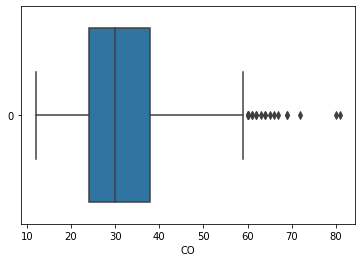

In [29]:
# checking CO
sns.boxplot(data=overall.CO, orient="h");plt.xlabel("CO");

The values above 60 are considered soft outliers, while those around 80 sounds very outlying. Let's check their time-series plot to see how consistent those values are within the data and when they happen:

In [30]:
# how much outliers are we dealing with?
# overall.loc[overall.CO >= 60].shape[0]
overall.query("CO >= 60").shape[0]

21

In [31]:
overall.sort_values(by="date", inplace=True, ascending=True)

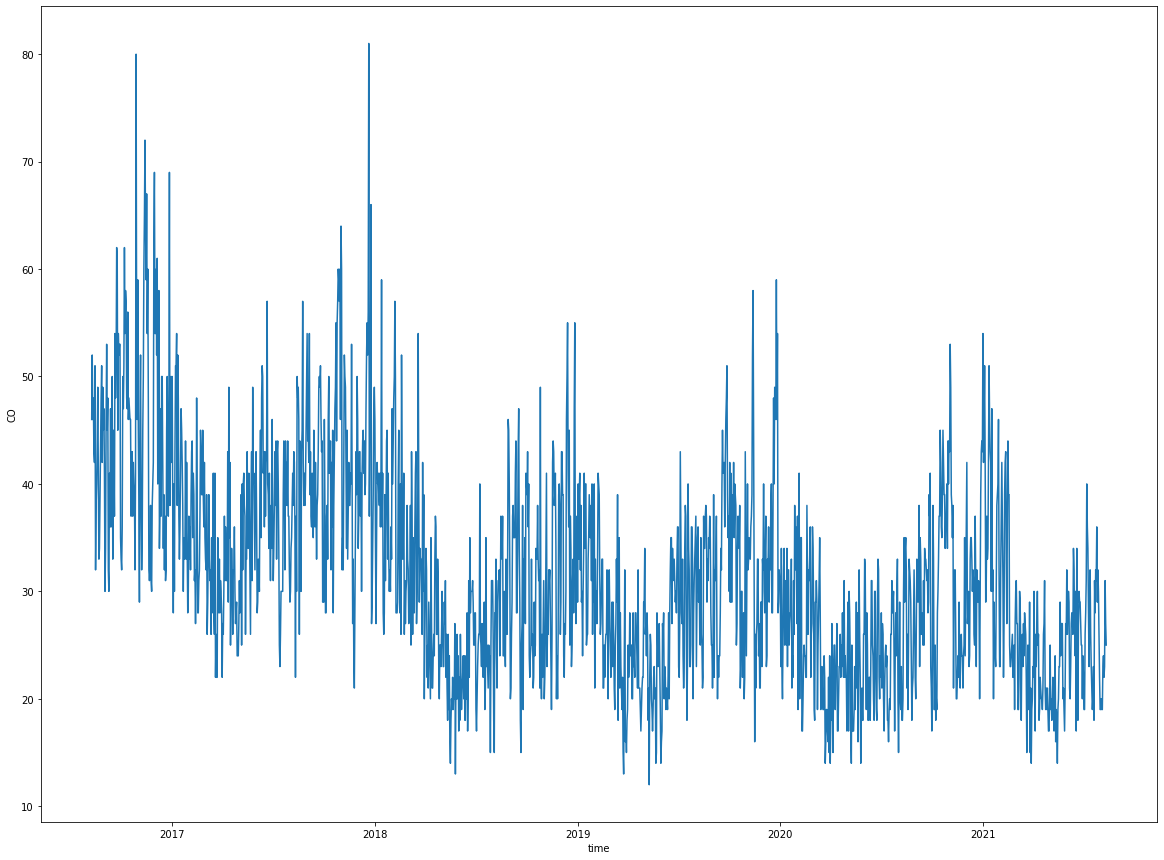

In [32]:
# plot time series of CO
plt.figure(figsize=(20, 15))
plt.xlabel("time")
plt.ylabel("CO")
plt.plot(overall.date, overall.CO);


Those outliers show something meaningful here. First that they appeared to have happened during turning years of 2017 and 2018. Secondly it also indicate that during those times, we had more concentration of `CO` in the air and the overal time-series shows it has a decreasing trend. We can smooth it a little using rolling means(moving averages) as follows:

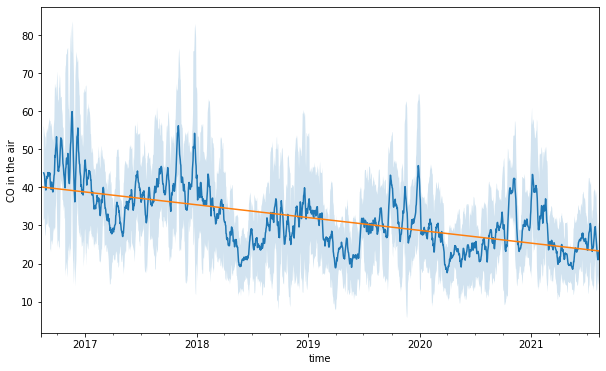

In [33]:
# define window for computing the rolling mean and standard deviation
plot_data = overall.CO
plot_data.index = overall.date

window = 10
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

"""
Create a plot of the series, where we first plot the series of rolling means, then we color 
the zone between the series of rolling means +- 2 rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10,6))

ax.fill_between(rolling_means.index, rolling_means + \
                2 * rolling_deviations, \
                rolling_means - \
                2 * rolling_deviations, \
                alpha = 0.2)


ax.set_xlabel("time")
ax.set_ylabel("CO in the air");

# plotting the regression line
x = np.arange(overall.date.size)

fit = np.polyfit(x, overall.CO, deg=1)

fit_function = np.poly1d(fit)

plt.plot(overall.date, fit_function(x))
plt.show();

Now let's confirm the result accross regions:

In [34]:
air.reset_index(drop=True, inplace=True)

In [35]:
colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(rc = {"figure.figsize": (18,8), 
              # "axes.titlesize" : 18, 
              "axes.labelsize" : 14, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 
             })

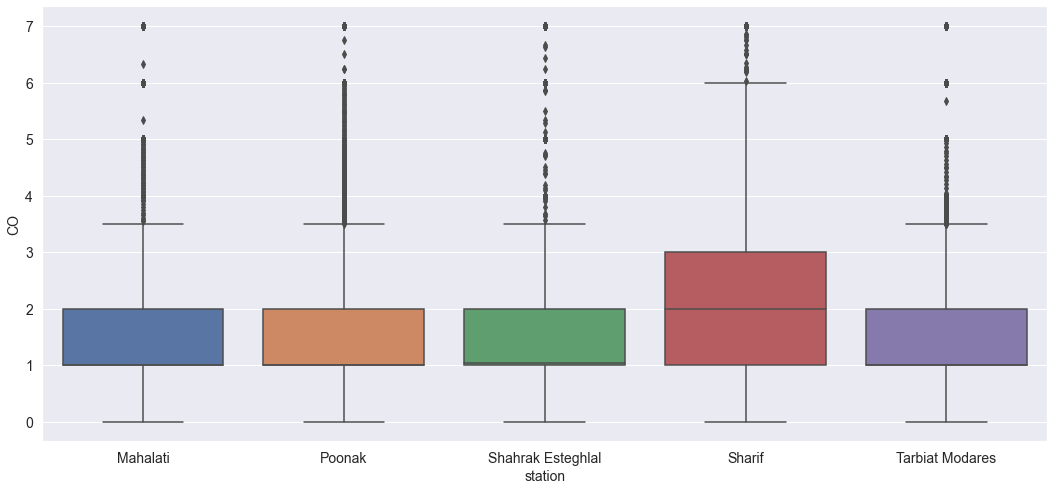

In [36]:
sns.boxplot(x = 'station', y = 'CO', data = air[air.CO <= air.CO.quantile(.99)]);

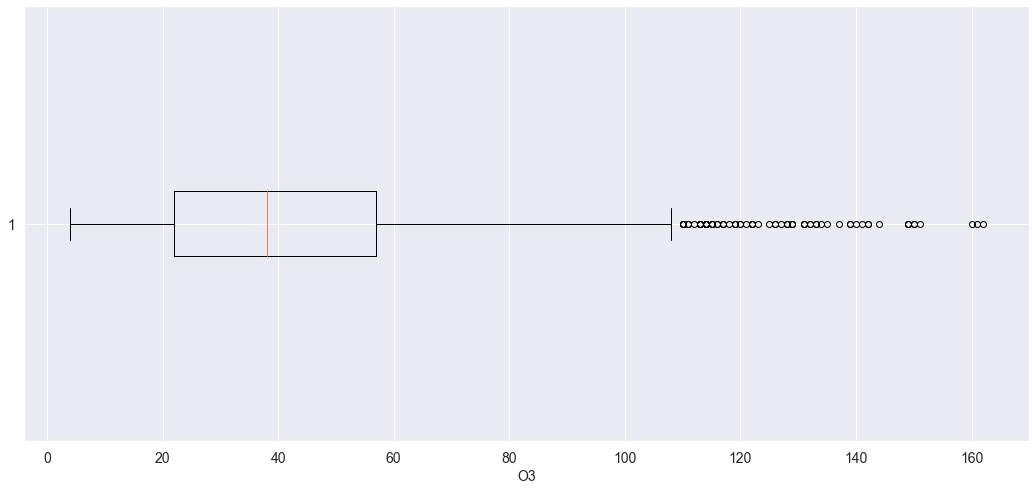

In [37]:
plt.boxplot(overall.O3, vert=False);plt.xlabel("O3");

In [40]:
overall.query("O3 > 110").shape[0]

75

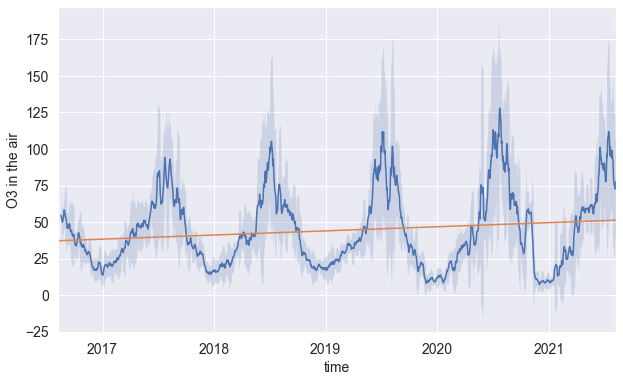

In [39]:
# define window for computing the rolling mean and standard deviation
plot_data = overall.O3.copy()
plot_data.index = overall.date

window = 10
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

"""
Create a plot of the series, where we first plot the series of rolling means, then we color 
the zone between the series of rolling means +- 2 rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10,6))

ax.fill_between(rolling_means.index, rolling_means + \
                2 * rolling_deviations, \
                rolling_means - \
                2 * rolling_deviations, \
                alpha = 0.2)


ax.set_xlabel("time")
ax.set_ylabel(f"{plot_data.name} in the air");

# plotting the regression line
x = np.arange(overall.date.size)

fit = np.polyfit(x, overall.O3, deg=1)

fit_function = np.poly1d(fit)

plt.plot(overall.date, fit_function(x))
plt.show();

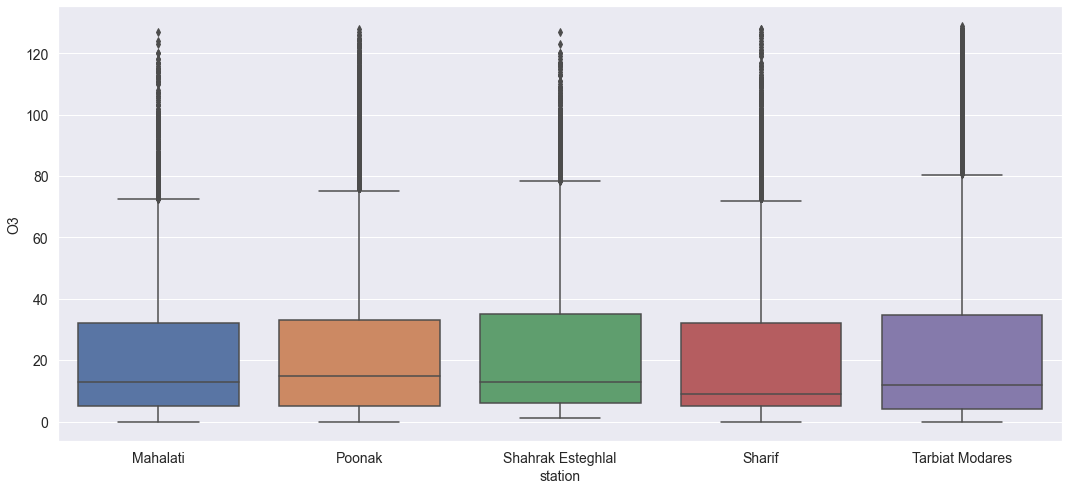

In [41]:
sns.boxplot(x = 'station', y = 'O3', data = air[air.O3 < air.O3.quantile(0.9995)]);

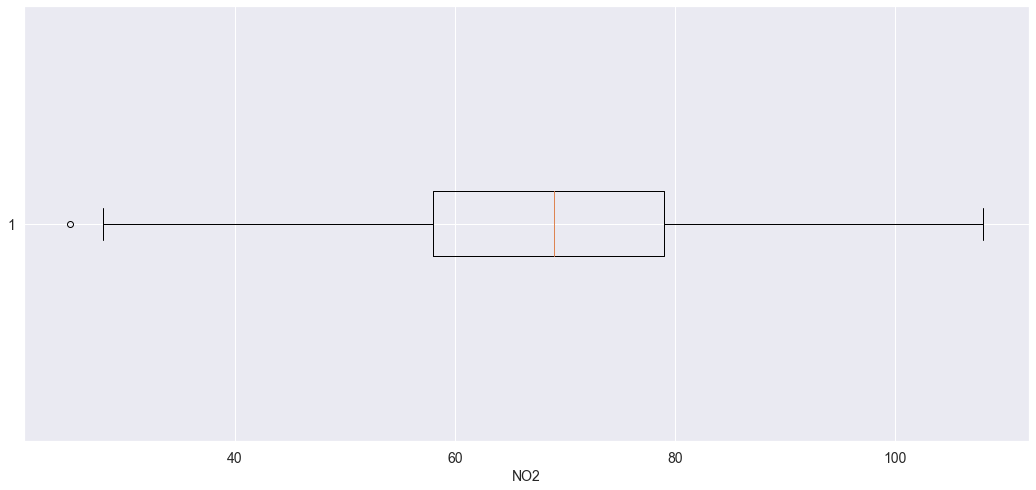

In [42]:
plt.boxplot(overall.NO2, vert=False);plt.xlabel("NO2");

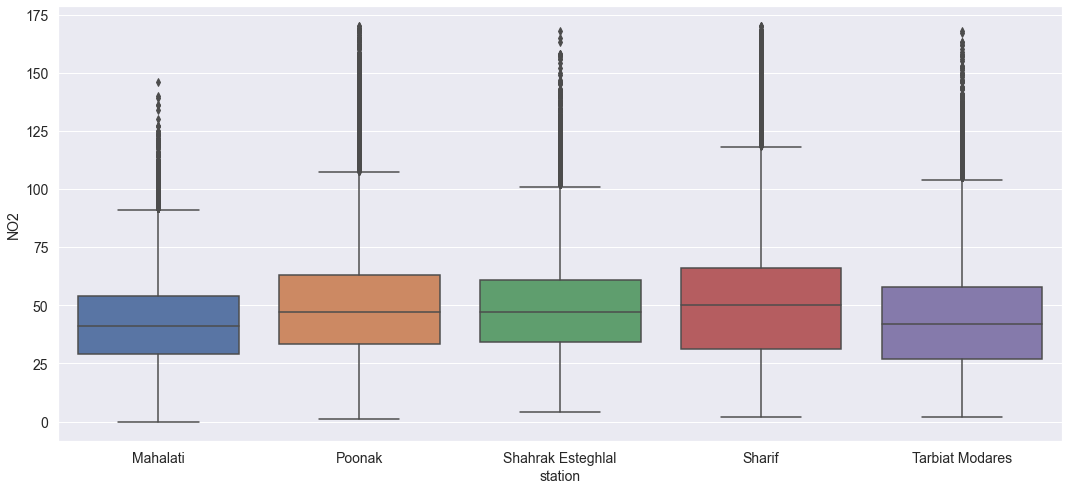

In [43]:
sns.boxplot(x = 'station', y = 'NO2', data = air[air.NO2 < air.NO2.quantile(0.9995)]);

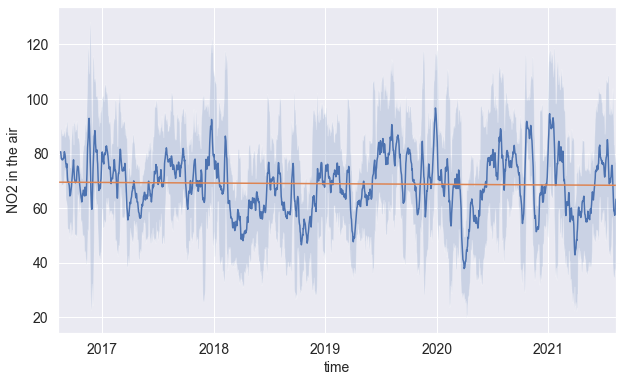

In [91]:
# define window for computing the rolling mean and standard deviation
plot_data = overall.NO2
plot_data.index = overall.date

window = 10
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

"""
Create a plot of the series, where we first plot the series of rolling means, then we color 
the zone between the series of rolling means +- 2 rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10,6))

ax.fill_between(rolling_means.index, rolling_means + \
                2 * rolling_deviations, \
                rolling_means - \
                2 * rolling_deviations, \
                alpha = 0.2)


ax.set_xlabel("time")
ax.set_ylabel(f"{plot_data.name} in the air");

# plotting the regression line
x = np.arange(overall.date.size)

fit = np.polyfit(x, overall.NO2, deg=1)

fit_function = np.poly1d(fit)

plt.plot(overall.date, fit_function(x))
plt.show();

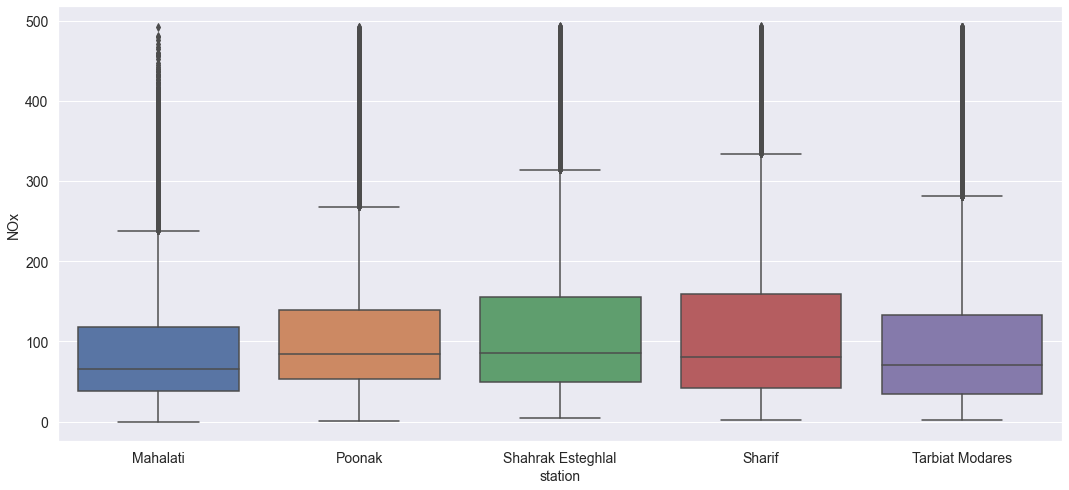

In [44]:
sns.boxplot(x = 'station', y = 'NOx', data = air[air.NOx < air.NOx.quantile(0.99)]);

Number of outliers: 48


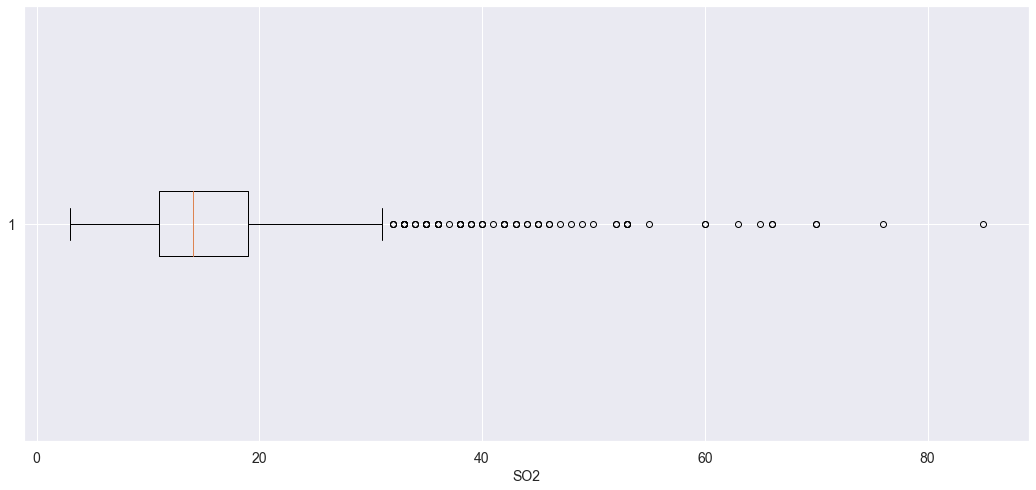

In [45]:
print("Number of outliers:", overall.loc[overall.SO2 > 36].shape[0])
plt.boxplot(overall.SO2, vert=False);
plt.xlabel("SO2");

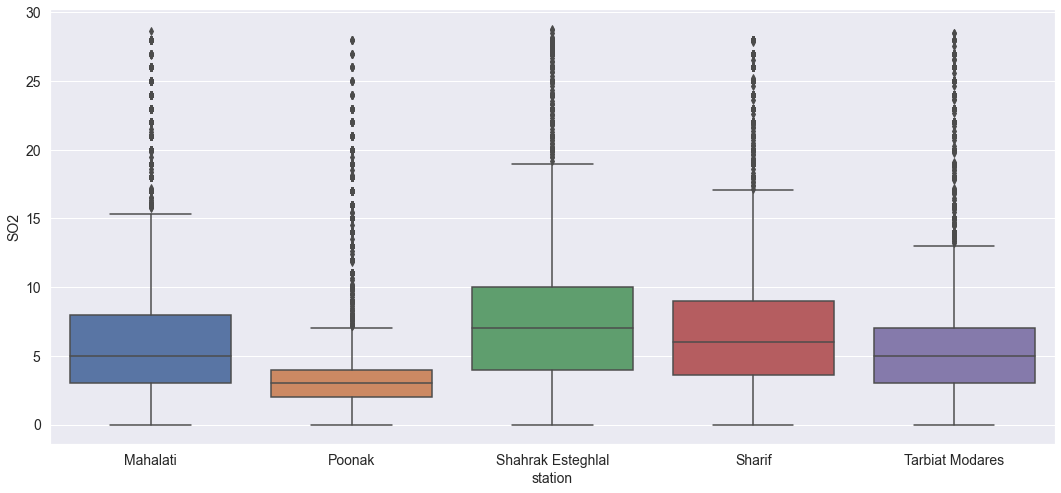

In [46]:
sns.boxplot(x = 'station', y = 'SO2', data = air[air.SO2 < air.SO2.quantile(0.99)]);

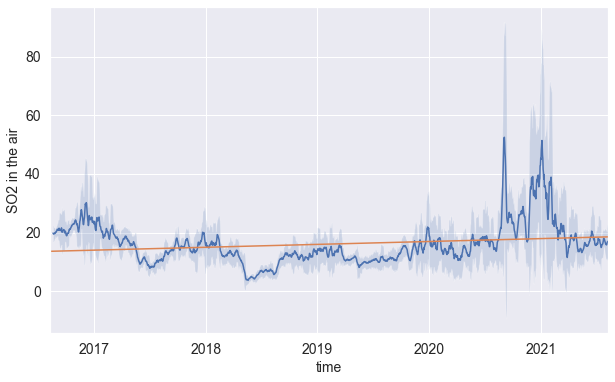

In [47]:
# define window for computing the rolling mean and standard deviation
plot_data = overall.SO2
plot_data.index = overall.date

window = 10
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

"""
Create a plot of the series, where we first plot the series of rolling means, then we color 
the zone between the series of rolling means +- 2 rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10,6))

ax.fill_between(rolling_means.index, rolling_means + \
                2 * rolling_deviations, \
                rolling_means - \
                2 * rolling_deviations, \
                alpha = 0.2)


ax.set_xlabel("time")
ax.set_ylabel(f"{plot_data.name} in the air");

# plotting the regression line
x = np.arange(overall.date.size)

fit = np.polyfit(x, overall.SO2, deg=1)

fit_function = np.poly1d(fit)

plt.plot(overall.date, fit_function(x))
plt.show();

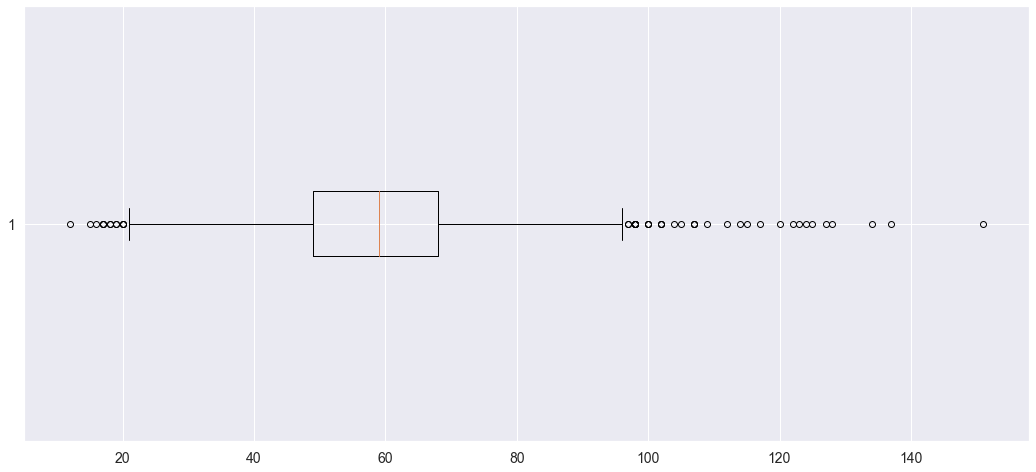

In [48]:
plt.boxplot(overall.PM10, vert=False);

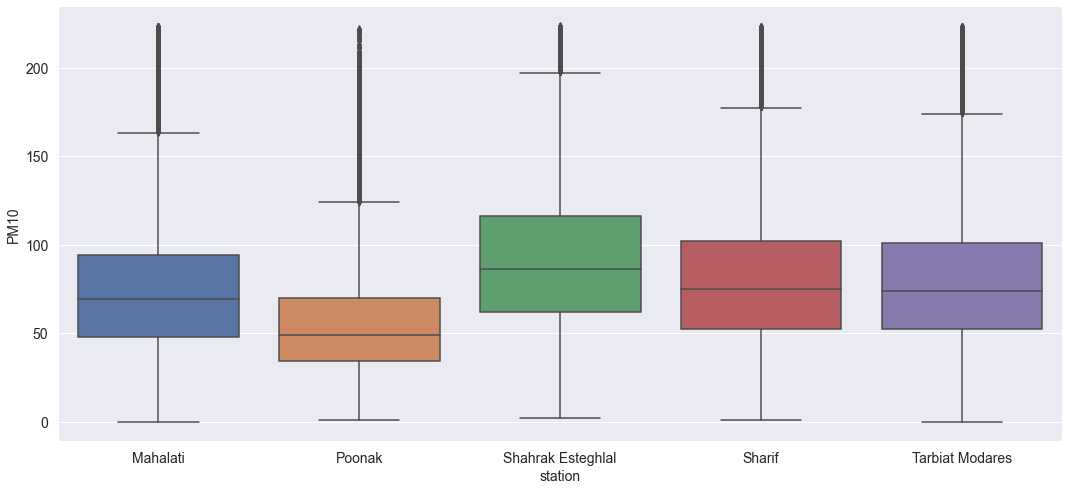

In [49]:
sns.boxplot(x = 'station', y = 'PM10', data = air[air.PM10 < air.PM10.quantile(0.99)]);

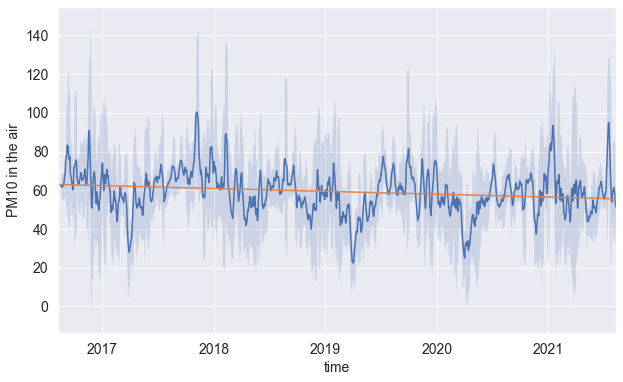

In [50]:
# define window for computing the rolling mean and standard deviation
plot_data = overall.PM10
plot_data.index = overall.date

window = 10
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

"""
Create a plot of the series, where we first plot the series of rolling means, then we color 
the zone between the series of rolling means +- 2 rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10,6))

ax.fill_between(rolling_means.index, rolling_means + \
                2 * rolling_deviations, \
                rolling_means - \
                2 * rolling_deviations, \
                alpha = 0.2)


ax.set_xlabel("time")
ax.set_ylabel(f"{plot_data.name} in the air");

# plotting the regression line
x = np.arange(overall.date.size)

fit = np.polyfit(x, overall.PM10, deg=1)

fit_function = np.poly1d(fit)

plt.plot(overall.date, fit_function(x))
plt.show();

<div id="pr">

### 2.3.Checking Periodic Results
    
Obviusly there are some seasonality in the data when you look at time-series plots. So let's check that up. We begin by building a column including the seasons of the data.

In [51]:
overall.date = pd.to_datetime(overall.date)# .dt.month

In [54]:
overall["season"] = overall.date.dt.month%12 // 3 + 1

In [55]:
# transform seasons
seasons_mapping = {1:"Winter", 2:"Spring", \
                  3:"Summer", 4:"Fall"}

overall["season"] = overall["season"].apply(lambda x: seasons_mapping[x])

In [56]:
air.date = pd.to_datetime(air.date)
air["season"] = air.date.dt.month%12 // 3 + 1
air["season"] = air["season"].apply(lambda x:seasons_mapping[x])

In [318]:
plot_data = air[["weekday","station","O3"]]

# plot_data = plot_data.melt(id_vars=["weekday", "station"],\
#                            var_name="type", value_name="cnt")
plot_data.head(4)

,weekday,station,O3
0,Tuesday,Mahalati,11.082508
1,Tuesday,Mahalati,11.095343
2,Saturday,Mahalati,12.404474
3,Saturday,Mahalati,12.417308


### Checking out seasonal impacts

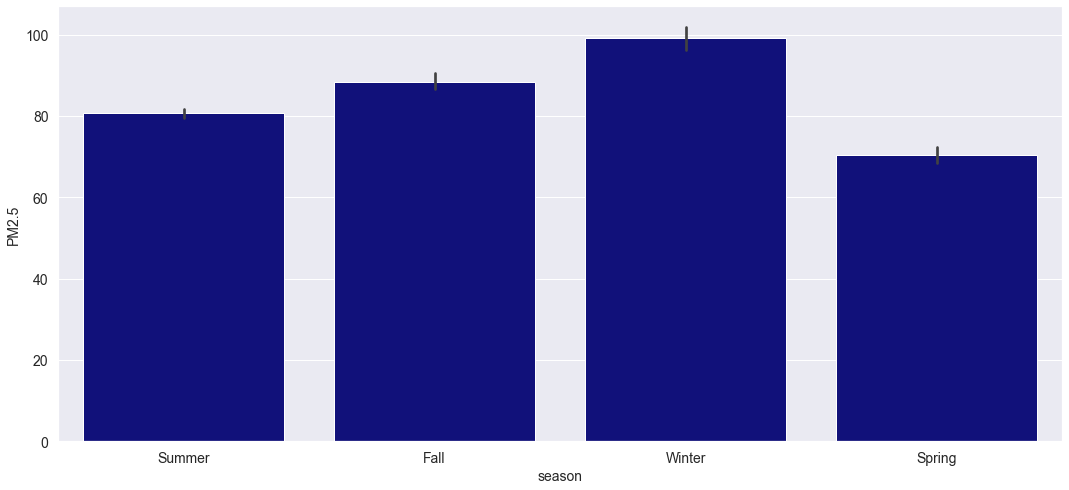

In [90]:
sns.barplot(x="season", y="PM2.5", data=overall, color="darkblue");

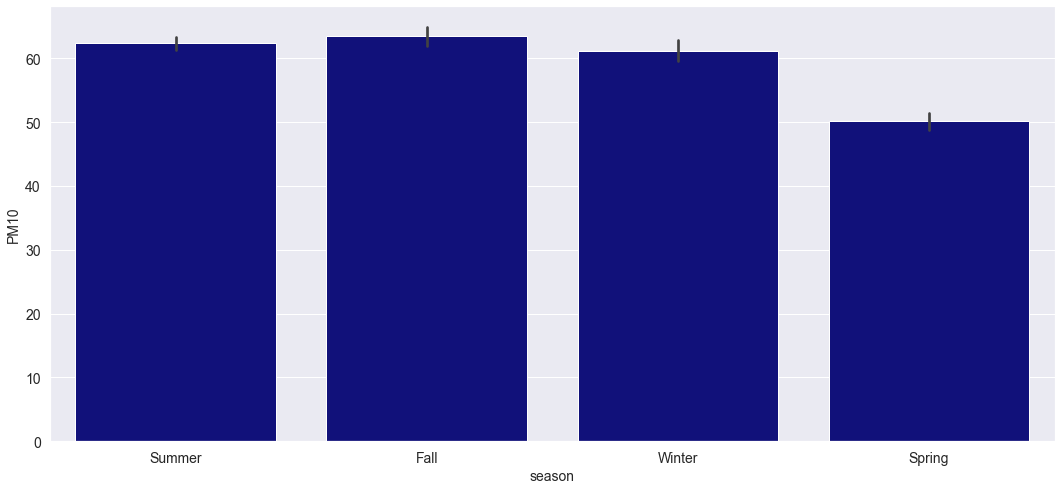

In [72]:
sns.barplot(x="season", y="PM10", data=overall, color="darkblue");

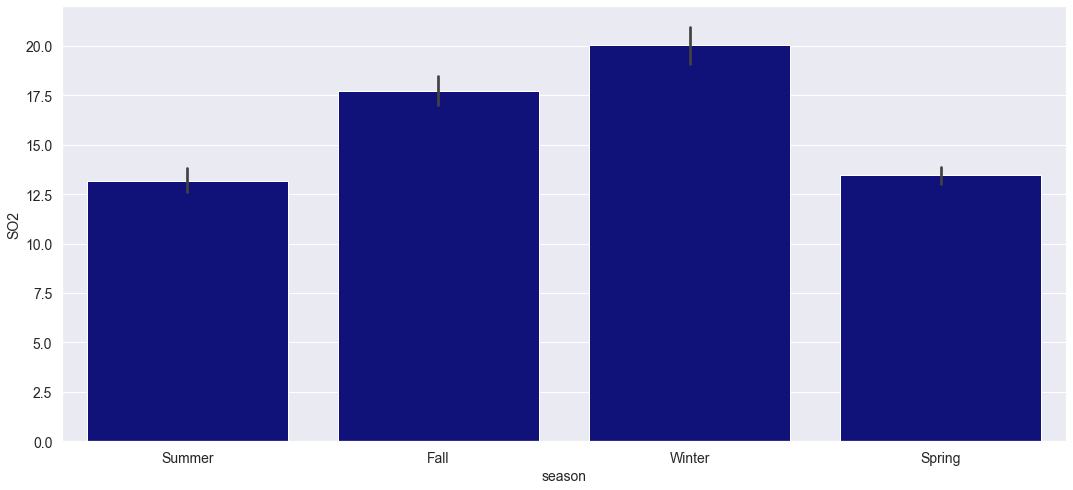

In [74]:
sns.barplot(x="season", y="SO2", data=overall, color="darkblue");

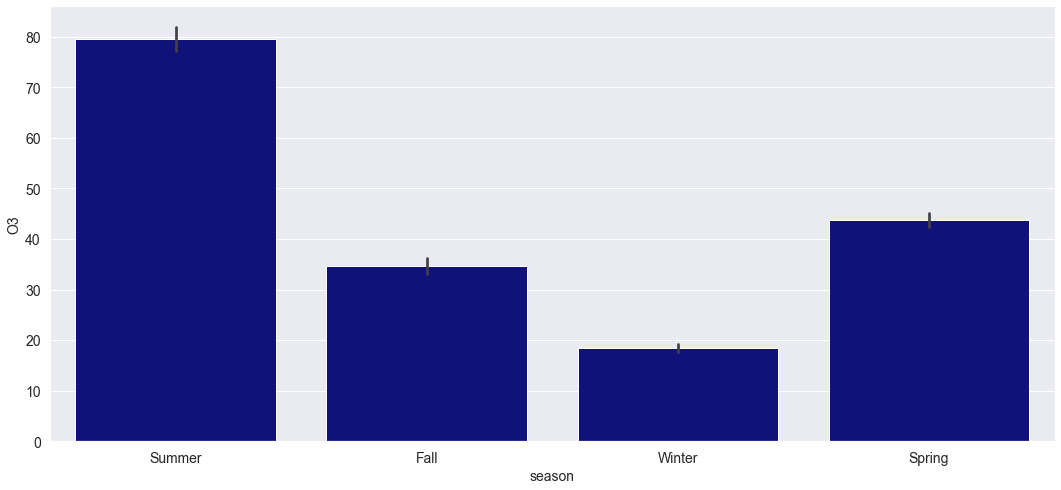

In [75]:
sns.barplot(x="season", y="O3", data=overall, color="darkblue");

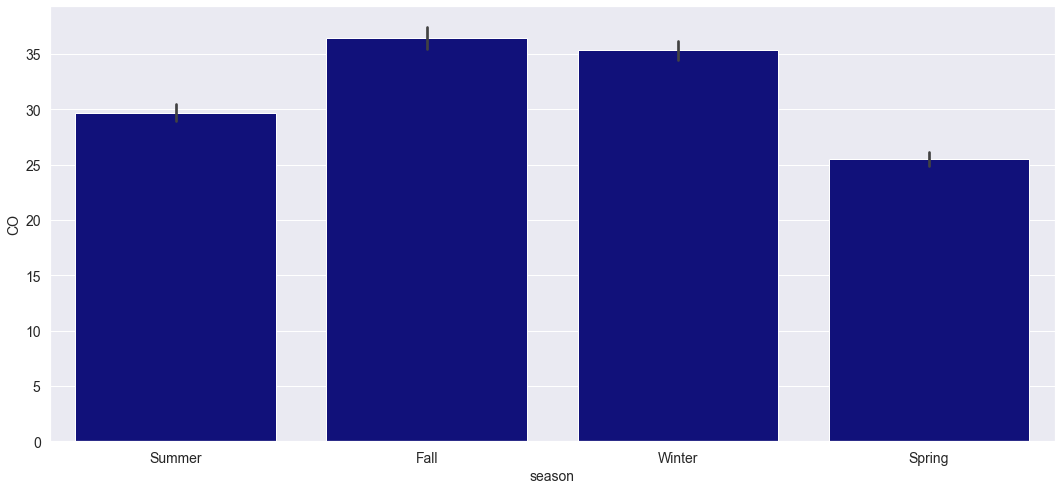

In [76]:
sns.barplot(x="season", y="CO", data=overall, color="darkblue");

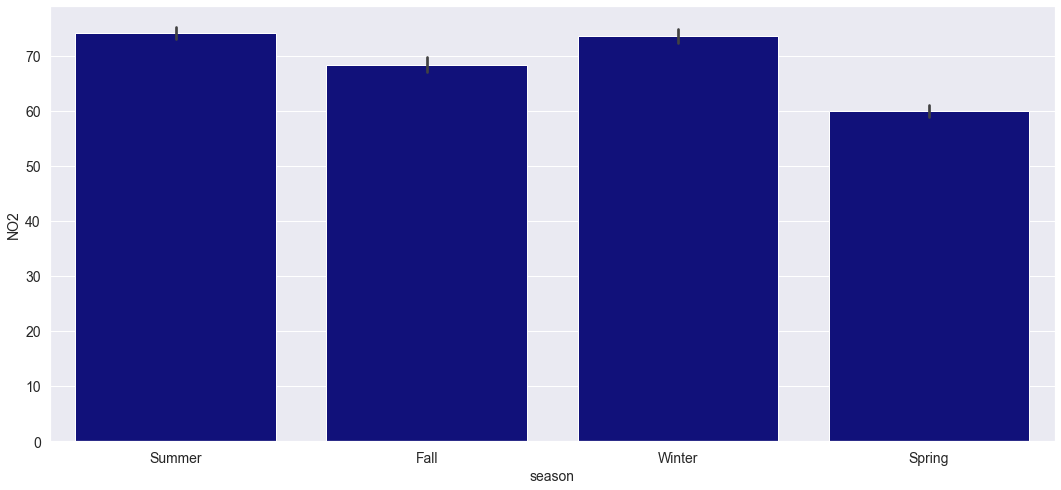

In [78]:
sns.barplot(x="season", y="NO2", data=overall, color="darkblue");

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


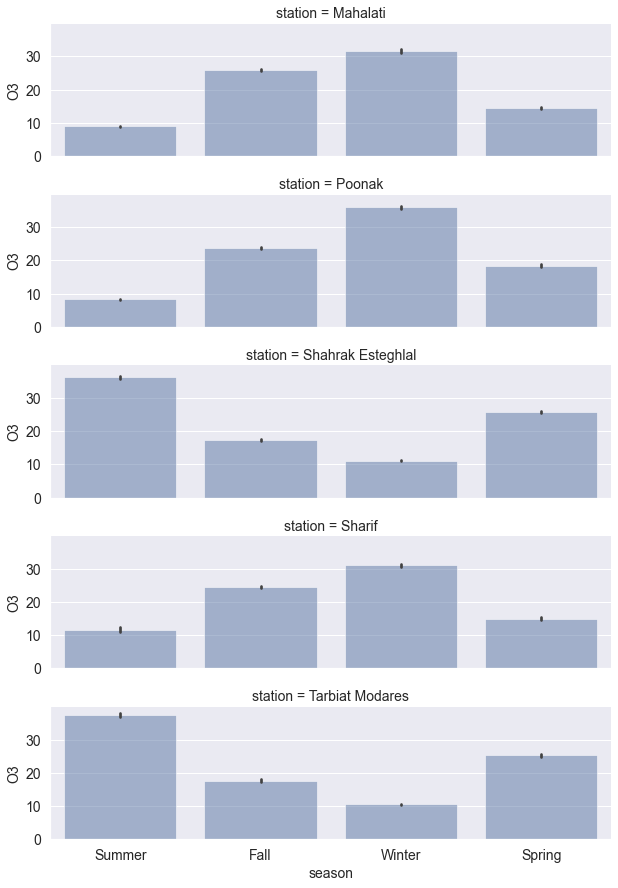

In [83]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "season", "O3",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


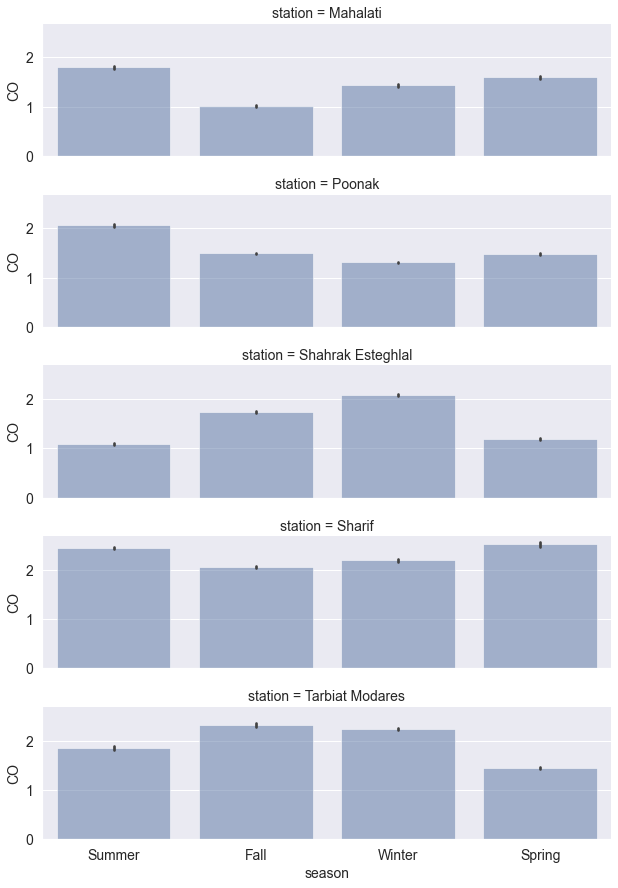

In [84]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "season", "CO",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


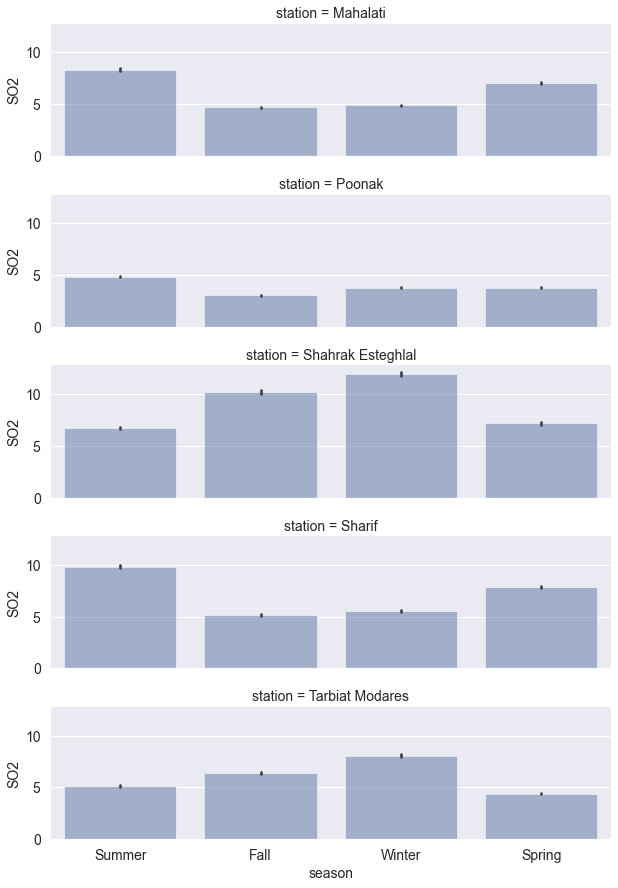

In [87]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "season", "SO2",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


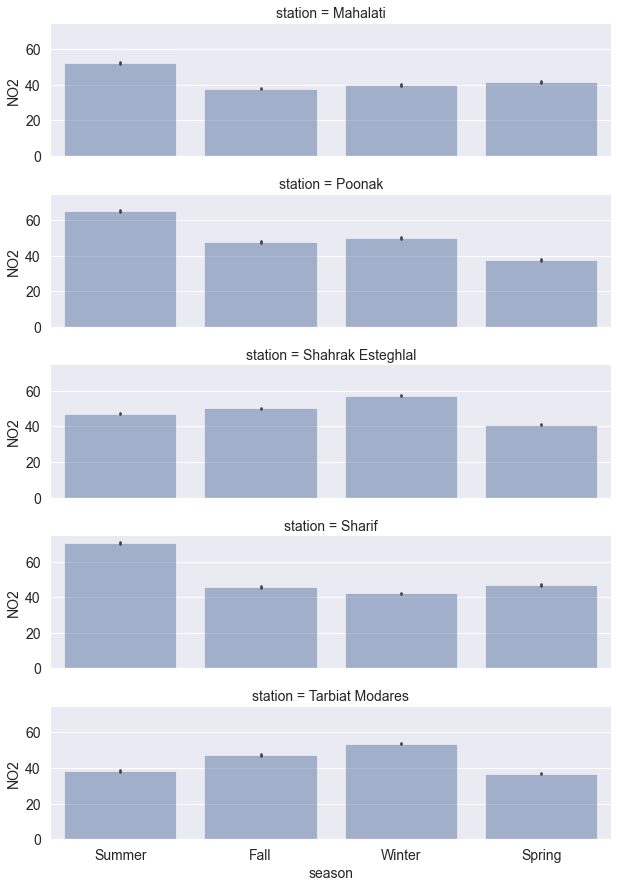

In [88]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "season", "NO2",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


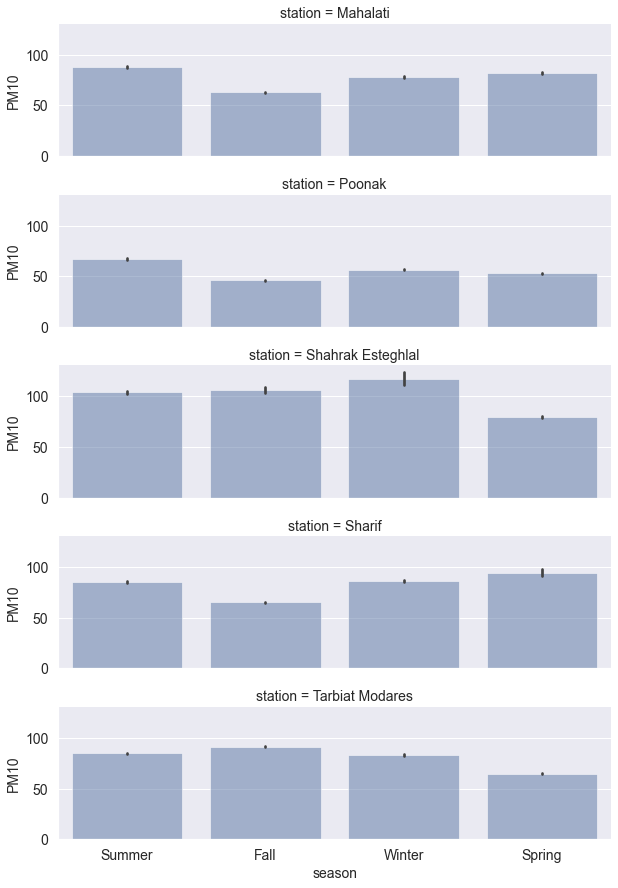

In [89]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "season", "PM10",
         alpha=0.5,);

### Weekdays

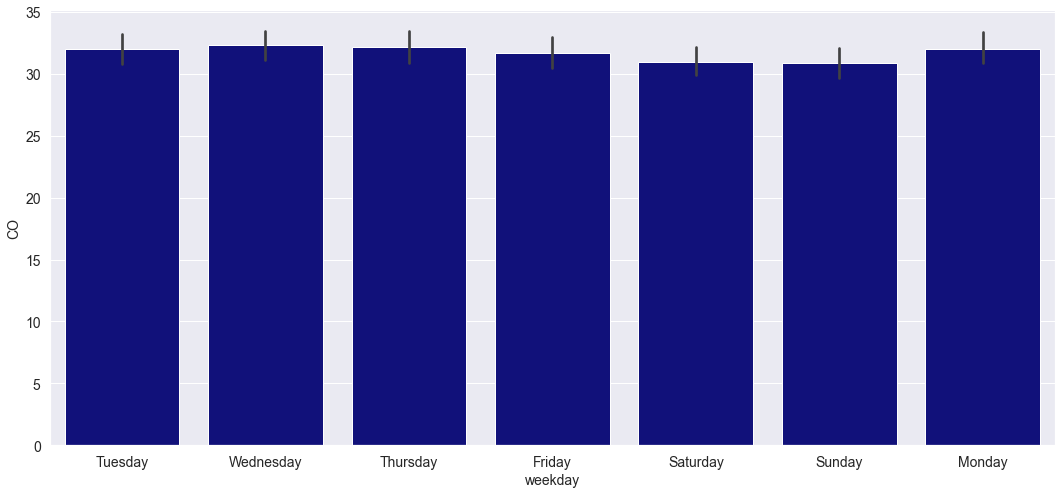

In [63]:
sns.barplot(x="weekday", y="CO", data=overall, color="darkblue");

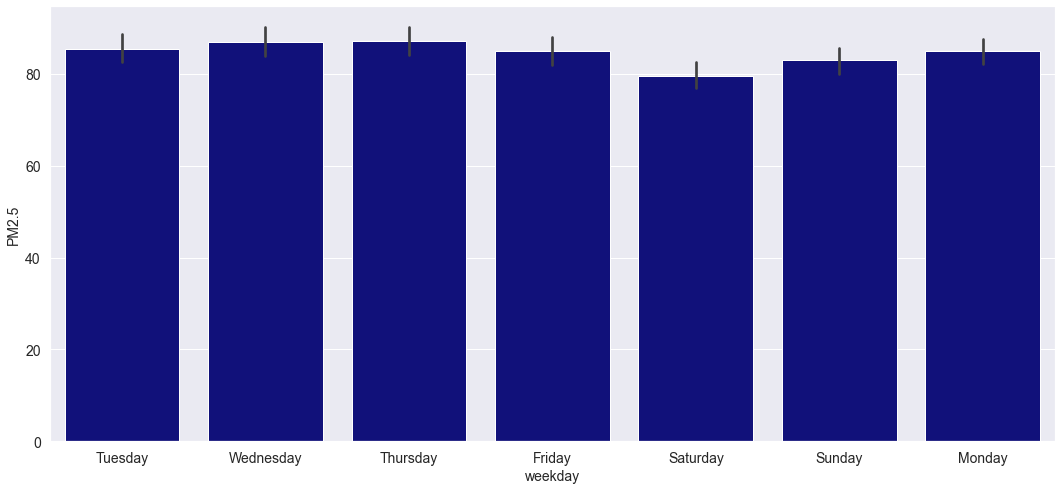

In [64]:
sns.barplot(x="weekday", y="PM2.5", data=overall, color="darkblue");

<AxesSubplot:xlabel='weekday', ylabel='SO2'>

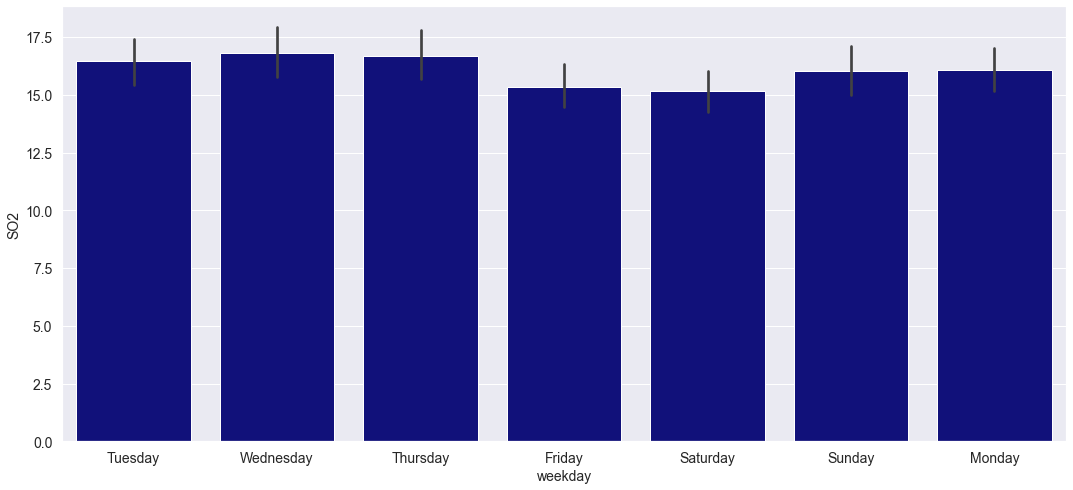

In [62]:
sns.barplot(x="weekday", y="SO2", data=overall, color="darkblue");

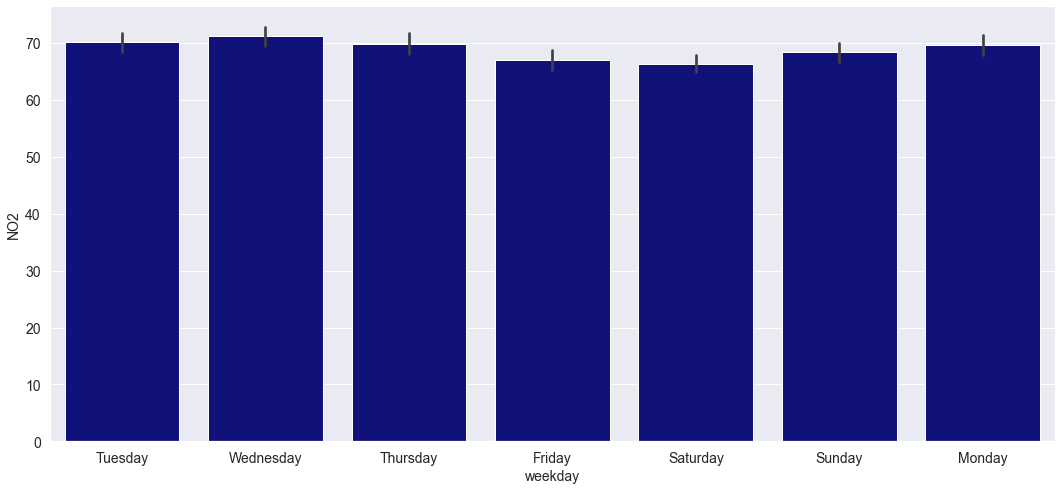

In [65]:
sns.barplot(x="weekday", y="NO2", data=overall, color="darkblue");

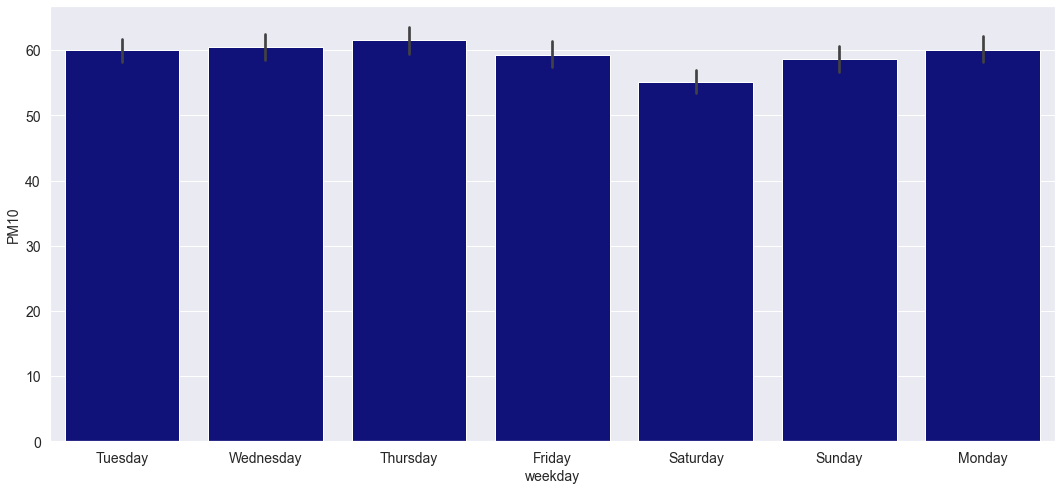

In [66]:
sns.barplot(x="weekday", y="PM10", data=overall, color="darkblue");

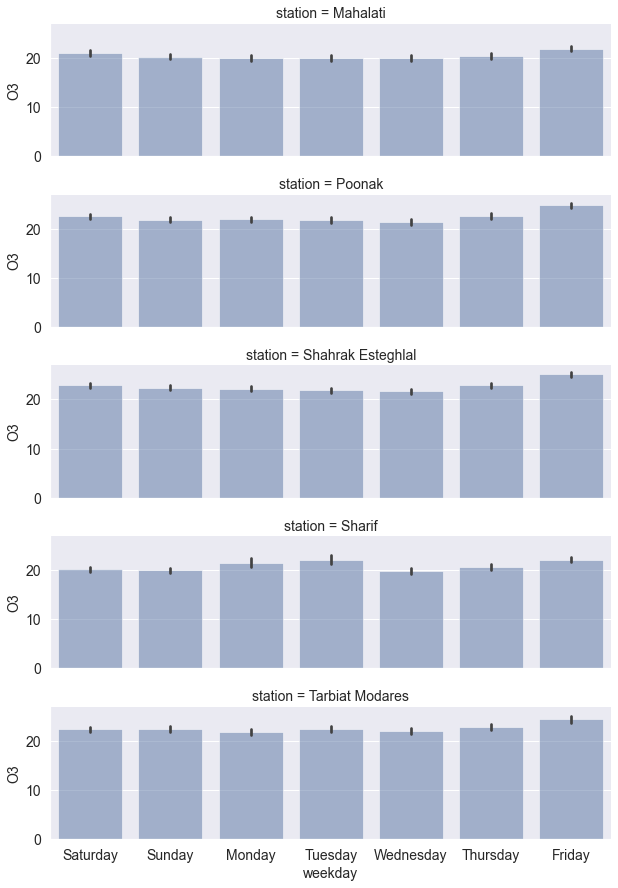

In [71]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "weekday", "O3",
         alpha=0.5,
        order=['Saturday','Sunday','Monday','Tuesday','Wednesday',
              'Thursday','Friday',]);

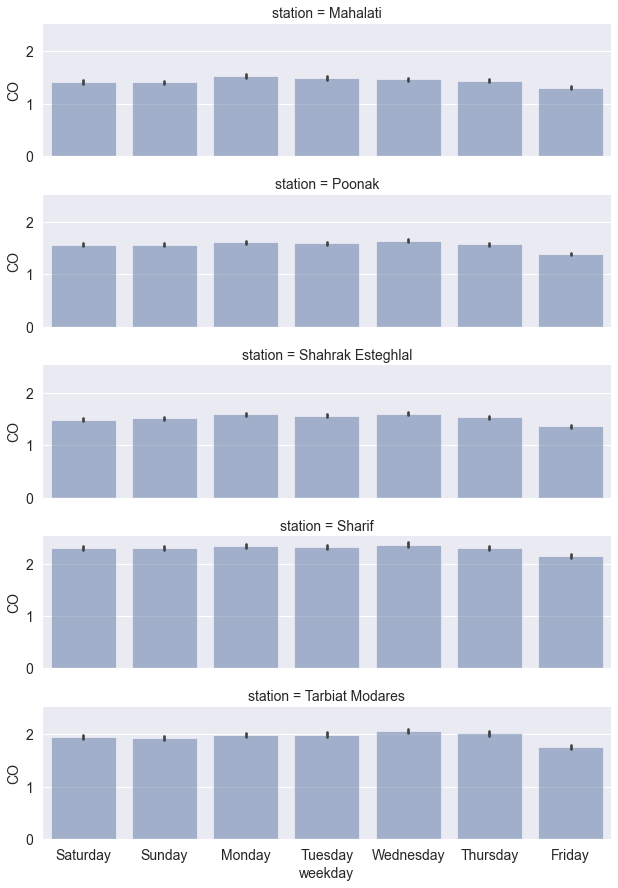

In [91]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "weekday", "CO",
         alpha=0.5,
        order=['Saturday','Sunday','Monday','Tuesday','Wednesday',
              'Thursday','Friday',]);

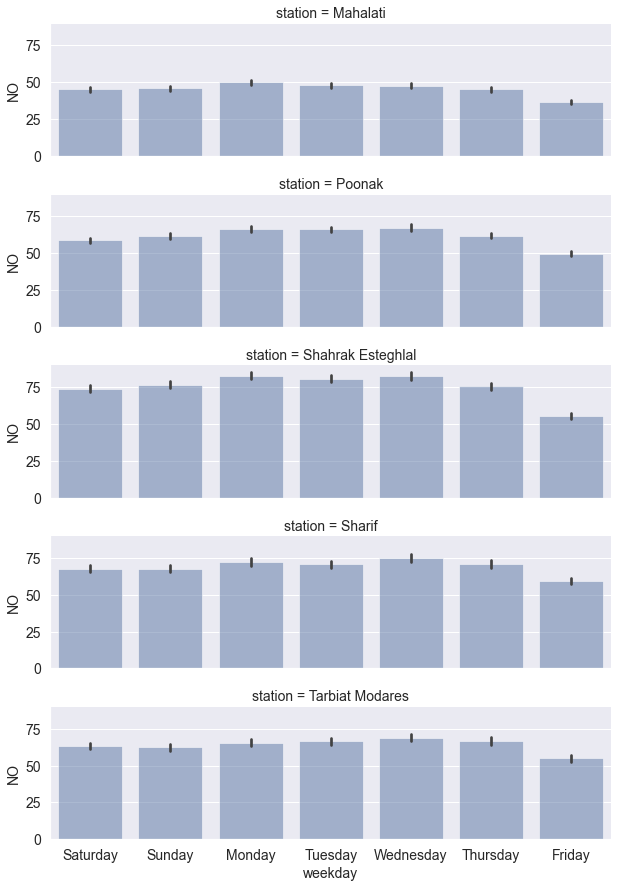

In [92]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "weekday", "NO",
         alpha=0.5,
        order=['Saturday','Sunday','Monday','Tuesday','Wednesday',
              'Thursday','Friday',]);

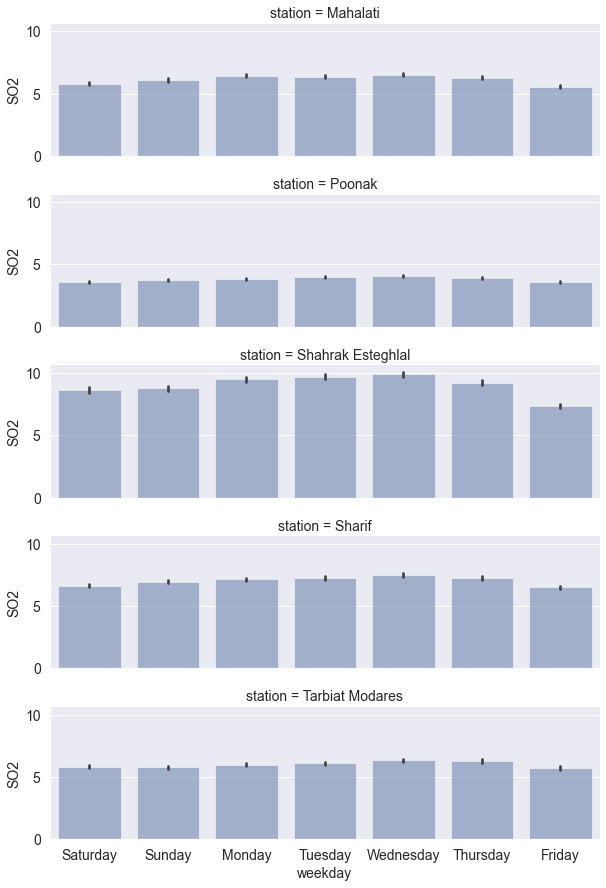

In [93]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "weekday", "SO2",
         alpha=0.5,
        order=['Saturday','Sunday','Monday','Tuesday','Wednesday',
              'Thursday','Friday',]);

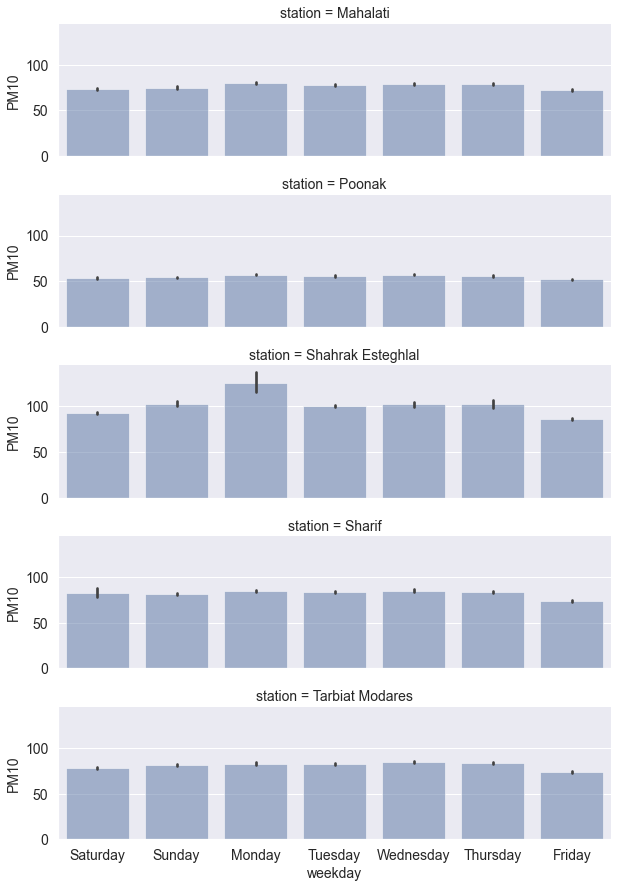

In [94]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "weekday", "PM10",
         alpha=0.5,
        order=['Saturday','Sunday','Monday','Tuesday','Wednesday',
              'Thursday','Friday',]);

### Changes by hours

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


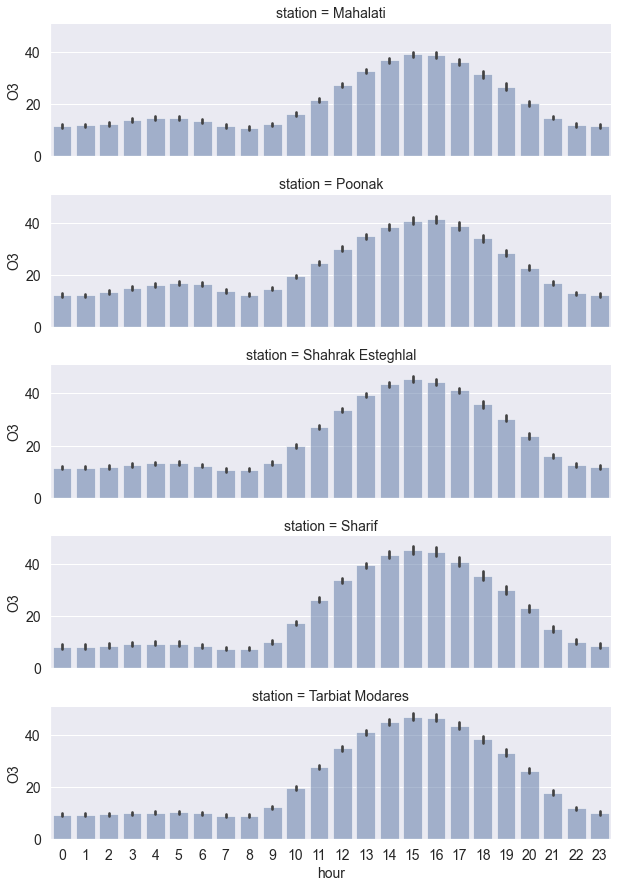

In [69]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "hour", "O3",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


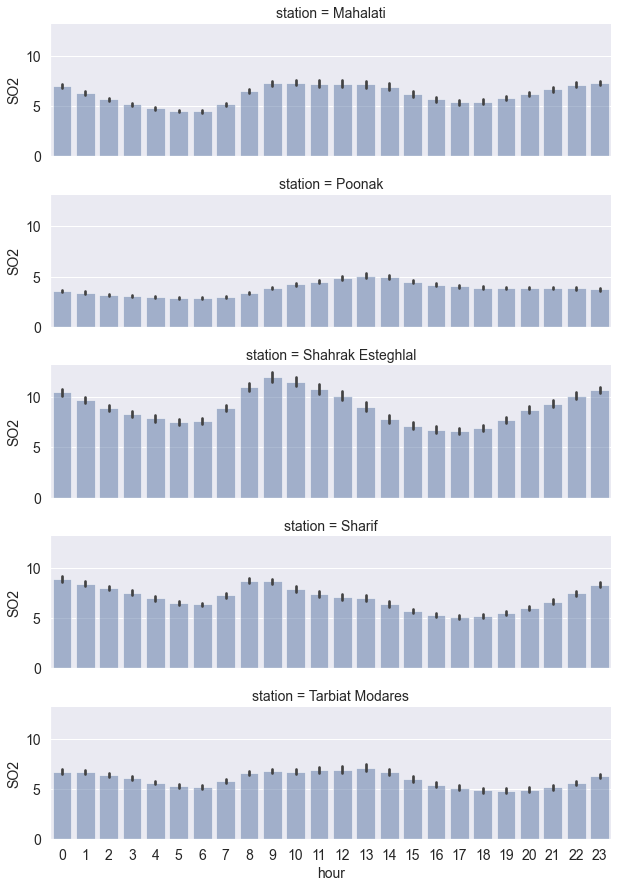

In [79]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "hour", "SO2",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


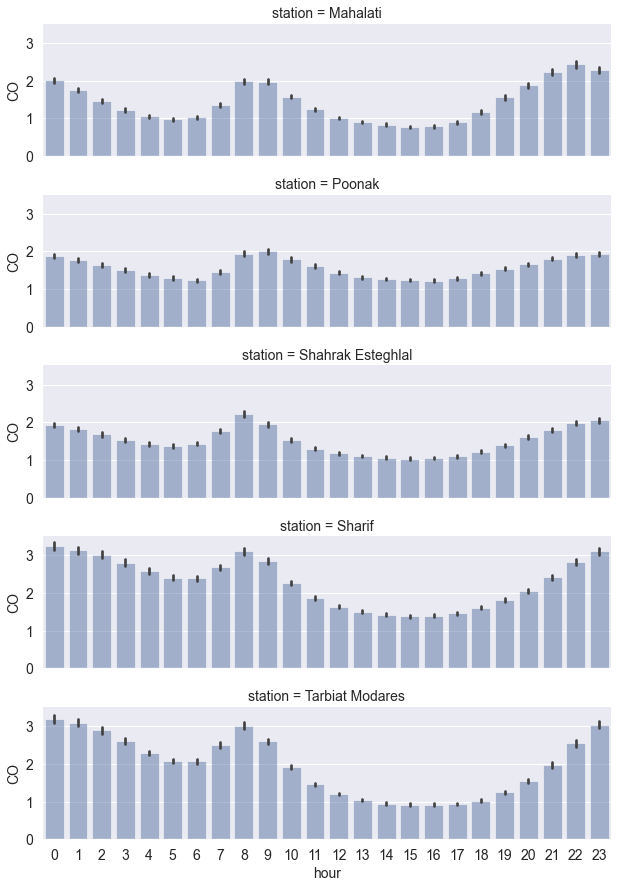

In [80]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "hour", "CO",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


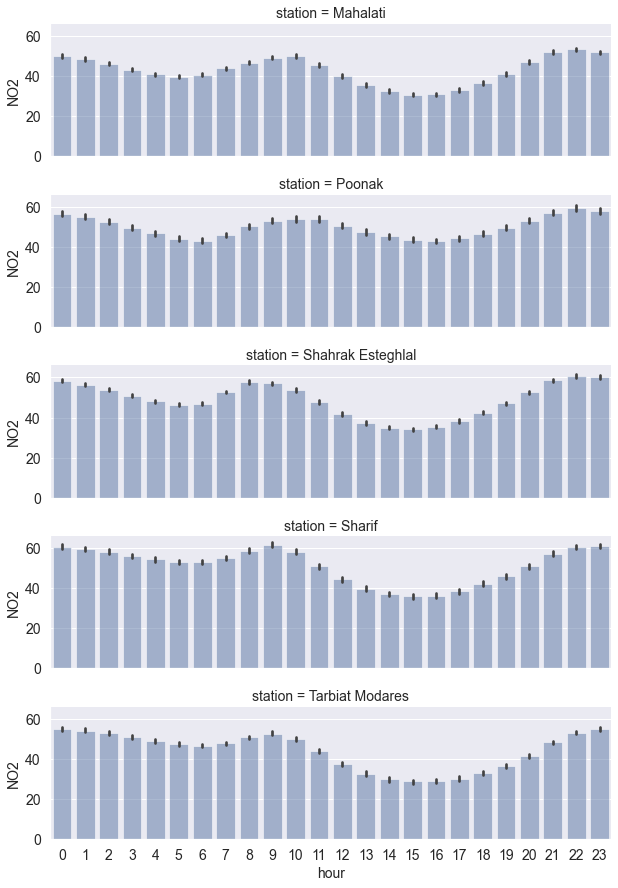

In [81]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "hour", "NO2",
         alpha=0.5,);

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


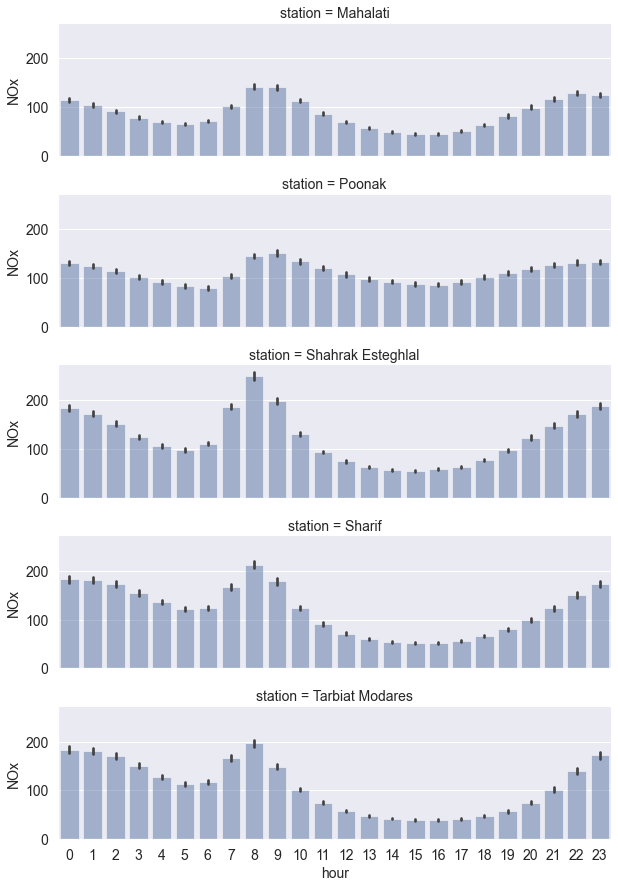

In [82]:
grid = sns.FacetGrid(air, row="station",
                     height=2.5, aspect=3.5,)

grid.map(sns.barplot, "hour", "NOx",
         alpha=0.5,);

In [226]:
air.columns

Index(['station', 'date', 'weekday', 'hour', 'O3', 'CO', 'NO', 'NO2', 'NOx',
       'SO2', 'PM10'],
      dtype='object')

In [ ]:
plot_data = data[["CO", "O3"]]
plot_data.index = data.date
ax = plot_data.plot(figsize=(10, 6))
ax.set_xlabel("time")
ax.set_ylabel("measure");

<div id="cc">

## 2.4.Checking Correlations

In [117]:
overall.columns

Index(['date', 'weekday', 'CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5', 'AQI',
       'clean', 'acceptable', 'unhealthy_for_the_sensitive', 'unhealthy',
       'very_unhealthy', 'hazardous', 'season'],
      dtype='object')

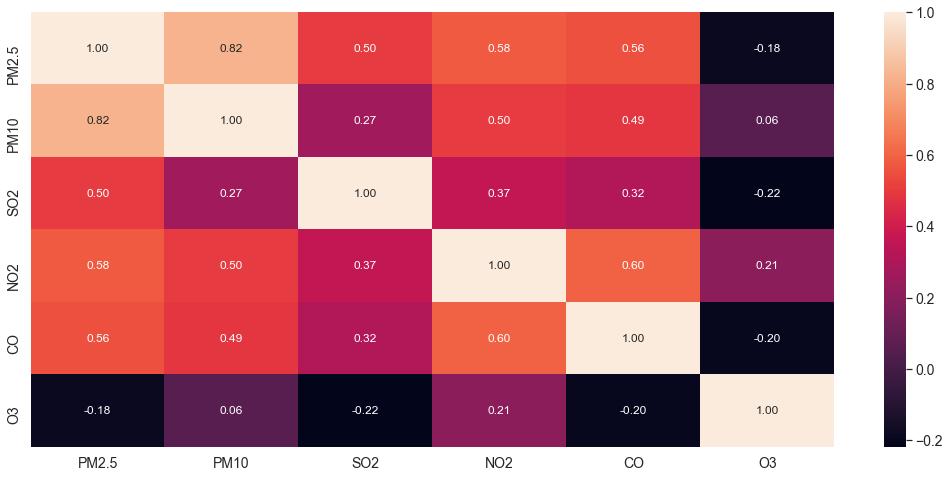

In [119]:
corr = overall[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].corr()

sns.heatmap(corr, annot=True, fmt=".2f");

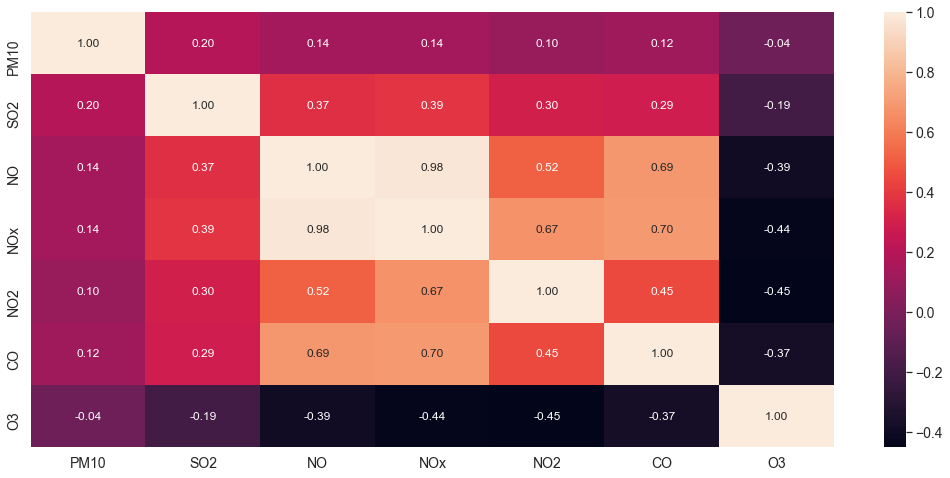

In [120]:
corr = air[["PM10", "SO2", "NO", "NOx", 'NO2','CO', 'O3']].corr()

sns.heatmap(corr, annot=True, fmt=".2f");

<div id="cd">

### 2.5.Calendar Distribution

In [105]:
def calendar_dist(data, pollutant, cbar_label, vmin=0, vmax=100):
    
    df = data.copy()
    import math
    # Setting feature date into datetime and creating columns year, month and day
    df.date = pd.to_datetime(df.date)
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    
    years = df.year.unique()
    n_years = len(df.year.unique())
    sub_row = int(math.ceil(n_years/6))
    high = sub_row*4 # high of the colorbar
    
    if n_years > 1:
        fig,axes = plt.subplots(1, n_years,sharex='col', 
                                sharey='row',figsize=(16,4)) 
        fig.tight_layout(h_pad=1.0, w_pad=0.5) # makeing plots get closer
        
        
        for i in range(n_years):
            # creating a table of relation between month and day, in specific year, giving pollutant conc. mean as result
            df_pivot = df[df['year'].isin([years[i]])]\
            .groupby(['month', 'day'])[pollutant].mean()
            df_pivot = pd.DataFrame(df_pivot).reset_index()
            df_pivot = df_pivot.pivot('month','day',pollutant)
            cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])
            if i==n_years-1:
                axes[i] = sns.heatmap(ax = axes[i], data=df_pivot.T,
                                    vmin=vmin,
                                    vmax=vmax,
                                    cmap="RdYlGn_r",
                                    cbar_ax = cbar_ax,
                                    cbar_kws={'label': cbar_label},
                                    cbar=True)
            else:
                axes[i] = sns.heatmap(ax = axes[i], data=df_pivot.T,
                                    vmin=vmin,
                                    vmax=vmax,
                                    cmap="RdYlGn_r",
                                    cbar=False)
            axes[i].set_xlabel('')
            axes[i].set_title(years[i])
            axes[i].set_xticks(np.arange(1, 13, 1))
            axes[i].set_xticklabels(months, rotation=90)
            if i==0:
                axes[i].set_ylabel('day')
            else:
                axes[i].set_ylabel('')
                
    elif n_years==1:
        df_pivot = df[df['year'].isin([years[0]])].groupby(['month', 'day'])[pollutant].mean()
        df_pivot = pd.DataFrame(df_pivot).reset_index()
        df_pivot=df_pivot.pivot('month','day',pollutant)
        ax = sns.heatmap(data=df_pivot.T,
                     vmin=vmin,
                     vmax=vmax,
                     cmap="RdYlGn_r",
                     cbar_kws={'label': cbar_label},
                     cbar=True)
        ax.set_xticklabels(months, rotation=90)
    
    else:
        fig,axes = plt.subplots(sub_row, 6,sharex='col', figsize=(16,high), sharey = 'row') #creating subplots, side by side
        fig.tight_layout(h_pad=1.0, w_pad=-1.5) # makeing plots get closer

        for i in range(n_years):
            df_pivot = df[df['year'].isin([years[i]])].groupby(['month', 'day'])[pollutant].mean()
            df_pivot = pd.DataFrame(df_pivot).reset_index()
            df_pivot = df_pivot.pivot('month','day',pollutant)

            if i<6: # for the first row
                k=0
                axes[k,i] = sns.heatmap(ax = axes[k,i], data=df_pivot.T,
                                          vmin=vmin,
                                          vmax=vmax,
                                          cmap="RdYlGn_r",
                                          cbar=False)
                axes[k,i].set_xlabel('')
                axes[k,i].set_title(years[i])
                if i==0:
                    axes[k,i].set_ylabel('day')
                else:
                    axes[k,i].set_ylabel('')

            elif i%6==0:
                k=int(i/6)
                j=int(i%6)
                if i==n_years-1:
                    axes[k,j] = sns.heatmap(ax = axes[k,j], data=df_pivot.T,
                                            vmin=vmin,
                                            vmax=vmax,
                                            cmap="RdYlGn_r",
                                            cbar_ax = cbar_ax,
                                            cbar_kws={'label': cbar_label},
                                            cbar=True)
                else:
                    axes[k,j] = sns.heatmap(ax = axes[k,j], data=df_pivot.T,
                                            vmin=vmin,
                                            vmax=vmax,
                                            cmap="RdYlGn_r",
                                            cbar=False)
                axes[k,j].set_xlabel('')
                axes[k,j].set_title(years[i])
                axes[k,j].set_xticklabels(months, rotation=90)

            else:
                k=int(math.ceil(i/6))-1
                j=i%6
                if i==n_years-1:
                    cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])
                    axes[k,j] = sns.heatmap(ax = axes[k,j], data=df_pivot.T,
                                            vmin=0,
                                            vmax=max(df_pivot),
                                            cmap="RdYlGn_r",
                                            cbar_ax = cbar_ax,
                                            cbar_kws={'label': cbar_label},
                                            cbar=True)
                else:
                    axes[k,j] = sns.heatmap(ax = axes[k,j], data=df_pivot.T,
                                            vmin=0,
                                            vmax=max(df_pivot),
                                            cmap="RdYlGn_r",
                                            cbar=False)
                axes[k,j].set_xlabel('')
                axes[k,j].set_title(years[i])
                axes[k,j].set_xticklabels(months, rotation=90)
                if j==0:
                    axes[k,j].set_ylabel('day')
                else:
                    axes[k,j].set_ylabel('')
                    
    if n_years%6 != 0 and n_years>6:
        rest = 6-n_years%6
        for i in range(rest):
            axes[1,5-i].axis('off')
            

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


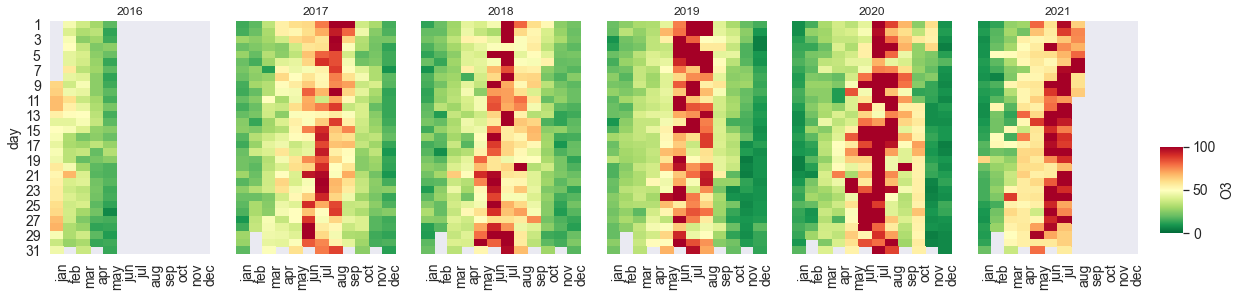

In [127]:
calendar_dist(overall, "O3", "O3", vmax=100)
plt.savefig("figs/calendar_O3.png", format="png")

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


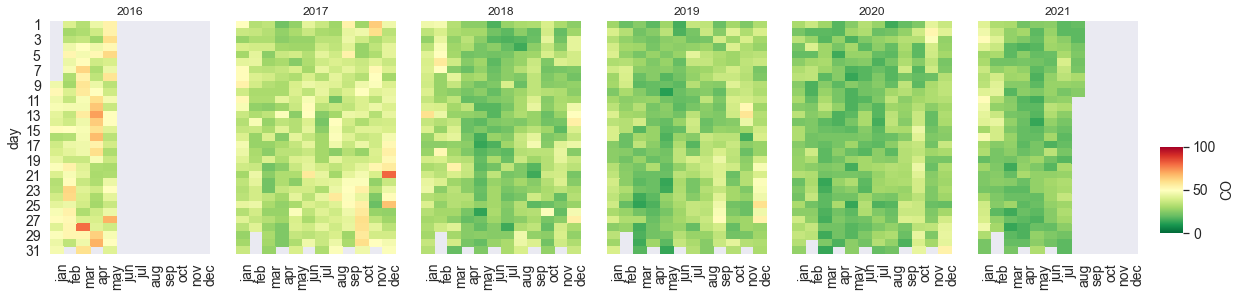

In [107]:
calendar_dist(overall, "CO", "CO", vmax=100)

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


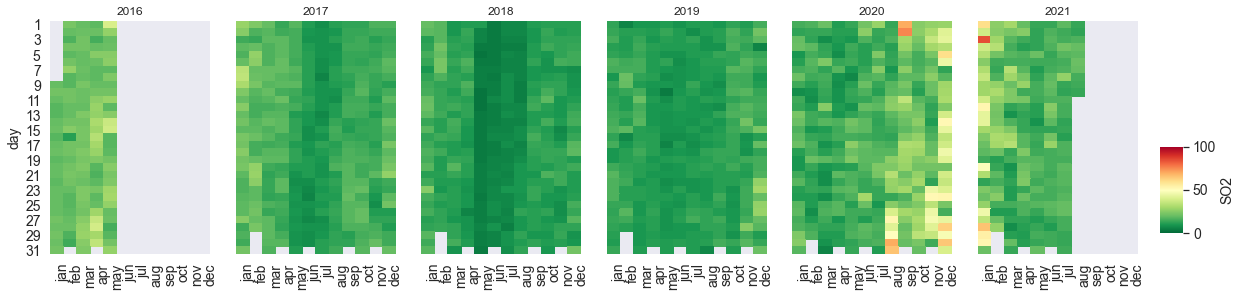

In [108]:
calendar_dist(overall, "SO2", "SO2", vmax=100)

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


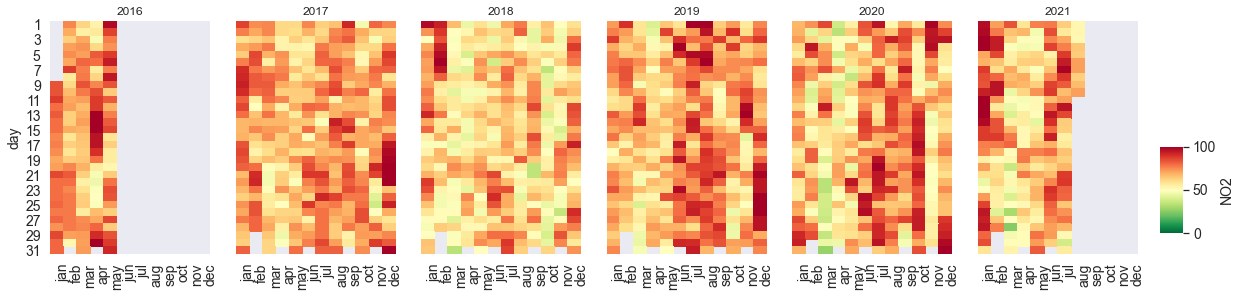

In [110]:
calendar_dist(overall, "NO2", "NO2", vmax=100)

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


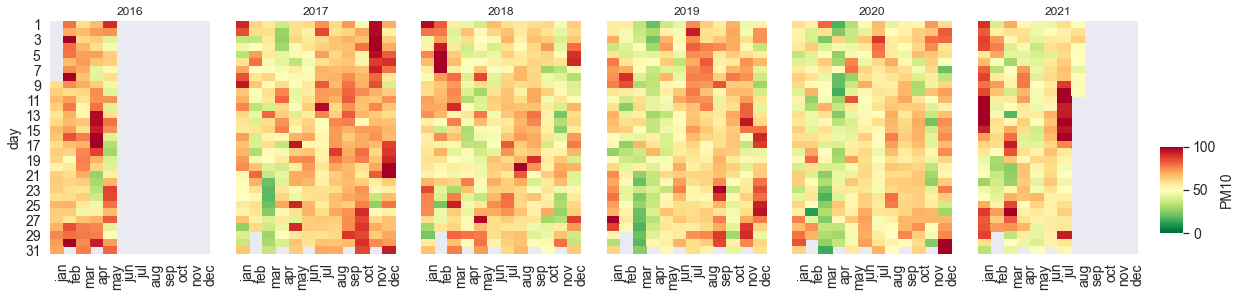

In [111]:
calendar_dist(overall, "PM10", "PM10", vmax=100)

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


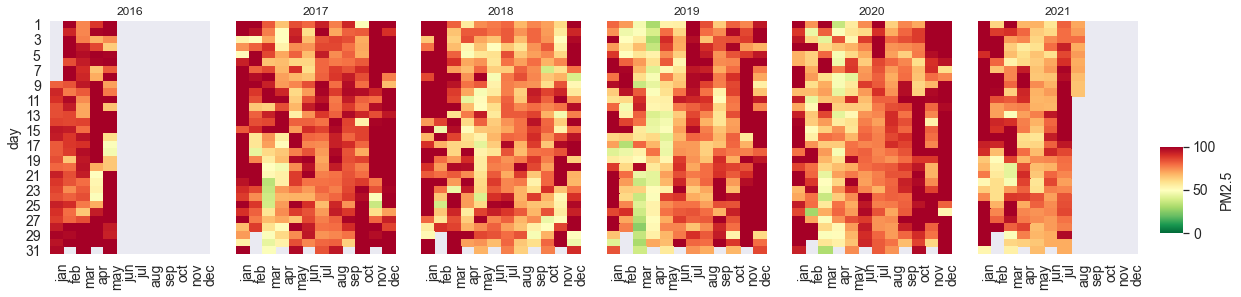

In [112]:
calendar_dist(overall, "PM2.5", "PM2.5", vmax=100)

<ipython-input-105-8ae11de23a6f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([1, .2, .02, sub_row*0.3])


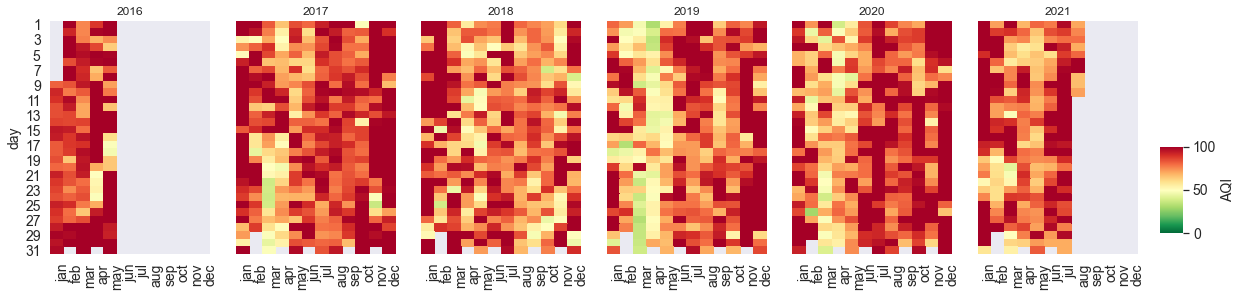

In [113]:
calendar_dist(overall, "AQI", "AQI", vmax=100)

### References

- [AQIArchive](http://airnow.tehran.ir/home/AQIArchive.aspx)
- [pandas 1.3.1 documentation](https://pandas.pydata.org/docs/)
- [stackoverflow](https://stackoverflow.com/)
- [kaggle]()
    - [Missing values in Time Series](https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners)
- [G.Govindan, S.Hora, K.Palagachev (2020) *The Data Analysis Workshop*](https://www.amazon.com/Data-Analysis-Workshop-state-art/dp/1839211385), Chapter 10
- [India Air Quality Data Analysis](https://towardsdatascience.com/india-air-pollution-data-analysis-bd7dbfe93841)
- [How to Analyse Air Pollution using Python?](https://www.analyticsvidhya.com/blog/2021/07/how-to-analyse-air-pollution-using-python/)